In [1001]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

In [1002]:
#importing data
#since index will act as Day count, we will start index from 1
df = pd.read_csv("WHO-COVID-19-global-data.csv")
df.index+=1
df

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
1,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
5,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
148595,2021-09-16,ZW,Zimbabwe,AFRO,266,127083,1,4551
148596,2021-09-17,ZW,Zimbabwe,AFRO,285,127368,9,4560
148597,2021-09-18,ZW,Zimbabwe,AFRO,264,127632,2,4562
148598,2021-09-19,ZW,Zimbabwe,AFRO,107,127739,1,4563


In [1003]:
#separating dataframe into dataframe for different countries for easier processing
ita = df[df['Country'] == 'Italy']
ita=ita.reset_index()
ita.index +=1

ger = df[df['Country'] == 'Germany']
ger=ger.reset_index()
ger.index +=1

tur = df[df['Country'] == 'Turkey']
tur=tur.reset_index()
tur.index +=1

In [1004]:
#After considering 50 cumulative cases as start of epidemic, we have found the following start dates for each country
#The index numbers represent Day number from start of original data

In [1005]:
tur.head(60)

,index,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
1,136687,2020-01-03,TR,Turkey,EURO,0,0,0,0
2,136688,2020-01-04,TR,Turkey,EURO,0,0,0,0
3,136689,2020-01-05,TR,Turkey,EURO,0,0,0,0
4,136690,2020-01-06,TR,Turkey,EURO,0,0,0,0
5,136691,2020-01-07,TR,Turkey,EURO,0,0,0,0
6,136692,2020-01-08,TR,Turkey,EURO,0,0,0,0
7,136693,2020-01-09,TR,Turkey,EURO,0,0,0,0
8,136694,2020-01-10,TR,Turkey,EURO,0,0,0,0
9,136695,2020-01-11,TR,Turkey,EURO,0,0,0,0
10,136696,2020-01-12,TR,Turkey,EURO,0,0,0,0


In [1006]:
ita_start =ita[ita['Date_reported']=='2020-02-23']
ita_start
ger_start =ger[ger['Date_reported']=='2020-02-29']
ger_start
tur_start =tur[tur['Date_reported']=='2020-03-18']
tur_start

,index,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
76,136762,2020-03-18,TR,Turkey,EURO,51,98,1,1


In [1007]:
ita_new = ita[51:625]
ger_new = ger[57:620]
tur_new = tur[75:626]
ita_new = ita_new.reset_index()
ita_new.index +=1
ita_new

,level_0,index,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
1,52,64633,2020-02-23,IT,Italy,EURO,62,79,2,2
2,53,64634,2020-02-24,IT,Italy,EURO,53,132,0,2
3,54,64635,2020-02-25,IT,Italy,EURO,97,229,4,6
4,55,64636,2020-02-26,IT,Italy,EURO,93,322,5,11
5,56,64637,2020-02-27,IT,Italy,EURO,78,400,1,12
...,...,...,...,...,...,...,...,...,...,...
570,621,65202,2021-09-14,IT,Italy,EURO,2792,4609205,36,129955
571,622,65203,2021-09-15,IT,Italy,EURO,4009,4613214,72,130027
572,623,65204,2021-09-16,IT,Italy,EURO,4826,4618040,73,130100
573,624,65205,2021-09-17,IT,Italy,EURO,5115,4623155,67,130167


In [1008]:
ger_new = ger_new.reset_index()
ger_new.index +=1
ger_new

,level_0,index,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
1,58,48964,2020-02-29,DE,Germany,EURO,10,57,0,0
2,59,48965,2020-03-01,DE,Germany,EURO,54,111,0,0
3,60,48966,2020-03-02,DE,Germany,EURO,18,129,0,0
4,61,48967,2020-03-03,DE,Germany,EURO,28,157,0,0
5,62,48968,2020-03-04,DE,Germany,EURO,39,196,0,0
...,...,...,...,...,...,...,...,...,...,...
559,616,49522,2021-09-09,DE,Germany,EURO,15431,4046112,50,92498
560,617,49523,2021-09-10,DE,Germany,EURO,12969,4059081,55,92553
561,618,49524,2021-09-11,DE,Germany,EURO,11214,4070295,45,92598
562,619,49525,2021-09-12,DE,Germany,EURO,7345,4077640,8,92606


In [1009]:
tur_new = tur_new.reset_index()
tur_new.index +=1
tur_new

,level_0,index,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
1,76,136762,2020-03-18,TR,Turkey,EURO,51,98,1,1
2,77,136763,2020-03-19,TR,Turkey,EURO,93,191,1,2
3,78,136764,2020-03-20,TR,Turkey,EURO,168,359,2,4
4,79,136765,2020-03-21,TR,Turkey,EURO,311,670,5,9
5,80,136766,2020-03-22,TR,Turkey,EURO,277,947,12,21
...,...,...,...,...,...,...,...,...,...,...
547,622,137308,2021-09-15,TR,Turkey,EURO,27802,6710666,276,60393
548,623,137309,2021-09-16,TR,Turkey,EURO,28224,6738890,248,60641
549,624,137310,2021-09-17,TR,Turkey,EURO,28118,6767008,262,60903
550,625,137311,2021-09-18,TR,Turkey,EURO,27692,6794700,237,61140


In [1010]:
ita_pop = 59550000
ger_pop = 83240000
tur_pop = 84340000

In [1011]:
#normalising data for each country
ita_norm_case = ita_new['Cumulative_cases']/ita_pop
ger_norm_case = ger_new['Cumulative_cases']/ger_pop
tur_norm_case = tur_new['Cumulative_cases']/tur_pop

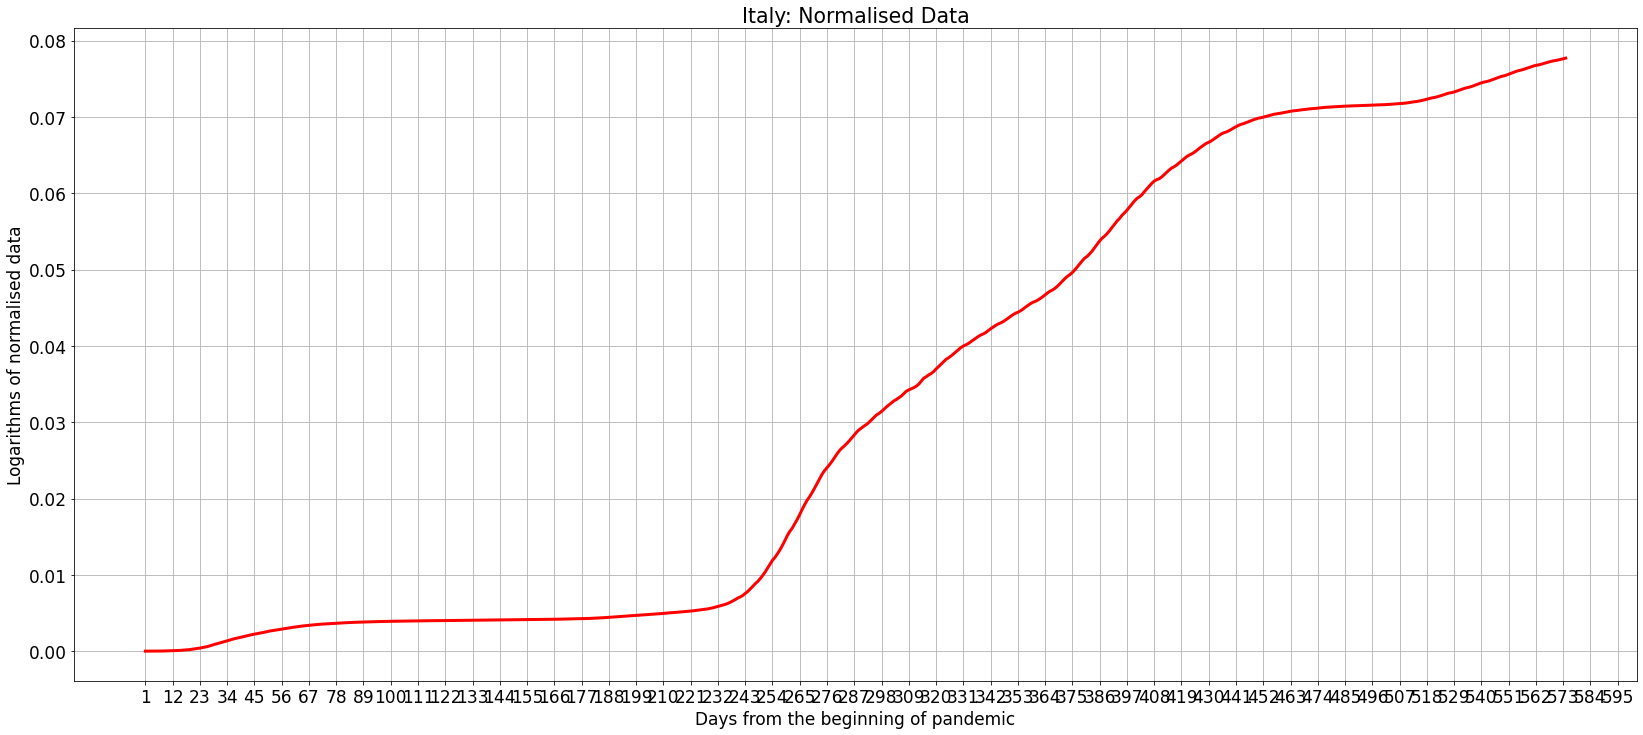

In [1012]:
x1 = ita_new.index
y1 = ita_norm_case

plt.plot(x1,y1,color="red",linewidth =3.0)
plt.xticks(np.arange(1,600,11))
#plt.yticks(np.arange(-14,0,0.5))
plt.xlabel('Days from the beginning of pandemic')
plt.ylabel('Logarithms of normalised data')
plt.title('Italy: Normalised Data')
plt.rcParams['figure.figsize'] = [32,15]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

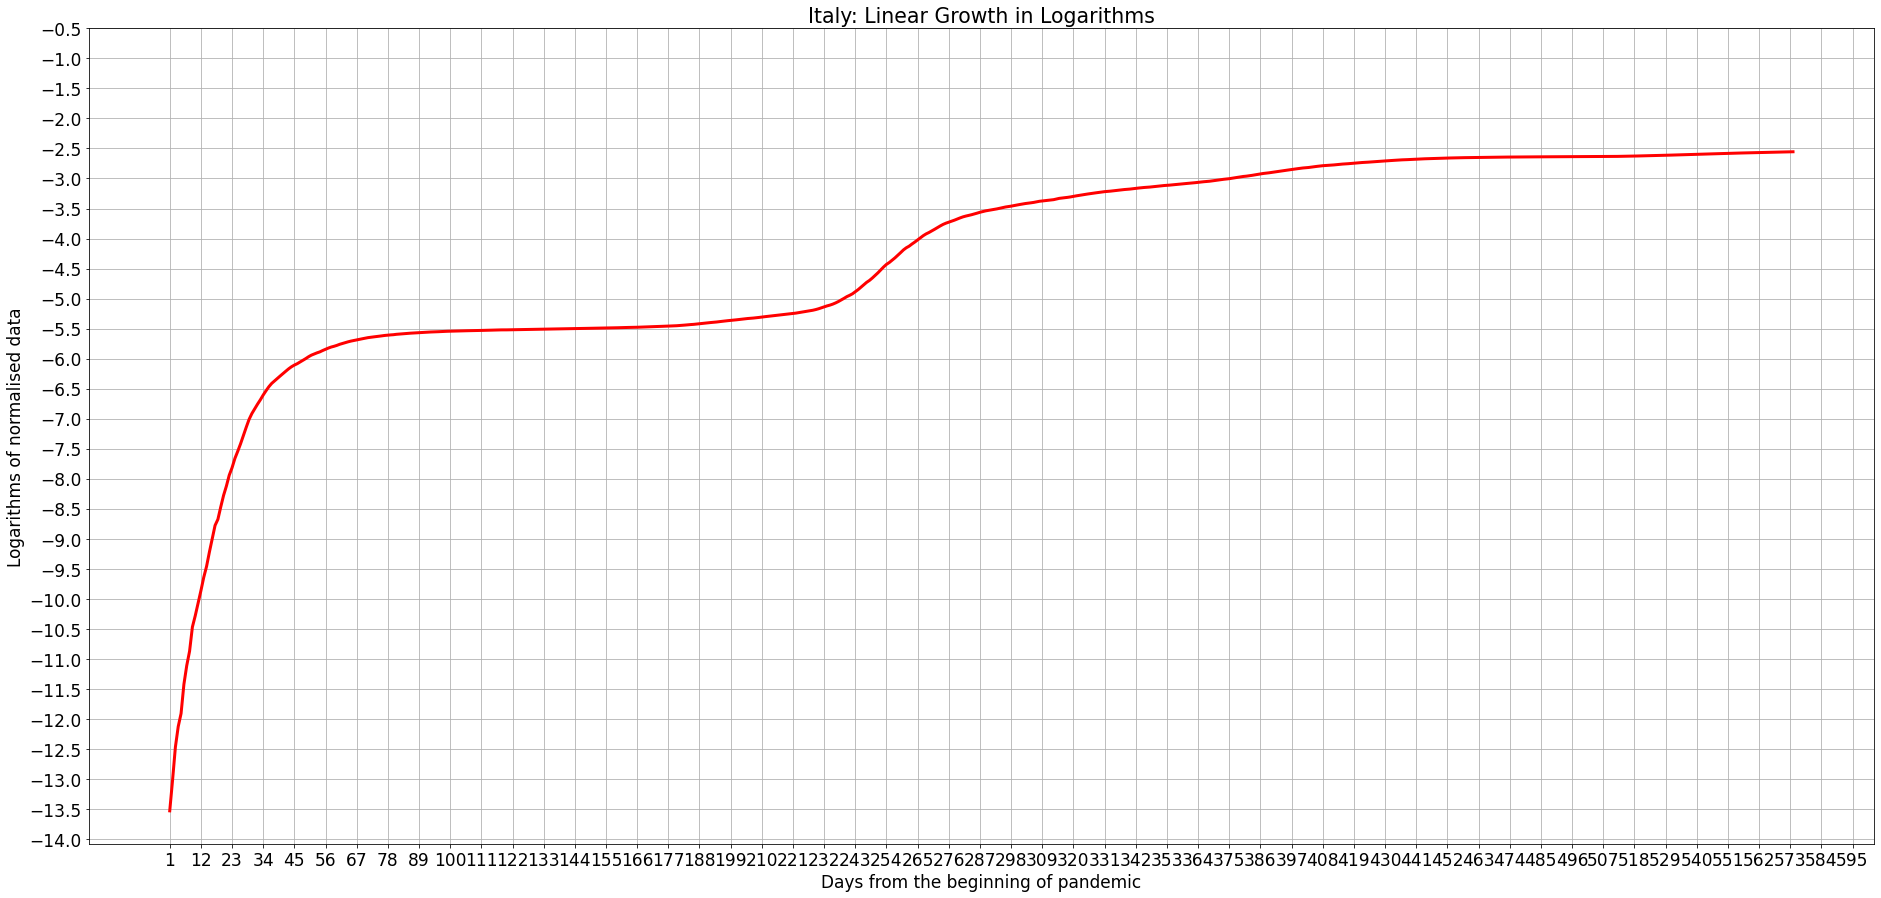

In [1013]:
x1 = ita_new.index
y1 = np.log(ita_norm_case)

plt.plot(x1,y1,color="red",linewidth =3.0)
plt.xticks(np.arange(1,600,11))
plt.yticks(np.arange(-14.00,0.00,0.5))
plt.xlabel('Days from the beginning of pandemic')
plt.ylabel('Logarithms of normalised data')
plt.title('Italy: Linear Growth in Logarithms')
plt.rcParams['figure.figsize'] = [30,15]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()


Start day for Italy : 52
Days - 10 : 42


### Interval 1 : 1-34
### Interval 2 : 35 - 235
### Interval 3 : 1-235
### Interval 4: 1-574

In [1014]:
x = ita_new.index.values
y= np.log(ita_norm_case)
x_int1 = x[:34]
y_int1 = y[:34]
x_int2 = x[34:235]
y_int2 = y[34:235]
x_int3 = x[:235]
y_int3 = y[:235]
x_int4 = x[:574]
y_int4 = y[:574]

curve1 = np.polyfit(x_int1,y_int1,1)
r1= curve1[0]
c1= curve1[1]
print(r1,c1)

curve2 = np.polyfit(x_int2,y_int2,1)
r2= curve2[0]
c2= curve2[1]
print(r2,c2)

curve3 = np.polyfit(x_int3,y_int3,1)
r3= curve3[0]
c3= curve3[1]
print(r3,c3)

curve4 = np.polyfit(x_int4,y_int4,1)
r4= curve4[0]
c4= curve4[1]
print(r4,c4)

0.1970057044682587 -12.57845966574984
0.0037340501732819643 -6.049790635801064
0.014260261548827638 -7.747109589659059
0.00963509192760245 -7.0626126056141585


In [1015]:
y1 = r1*x_int1 +c1
y2 = r2*x_int2 +c2
y3 = r3*x_int3 +c3
y4 = r4*x_int4 +c4

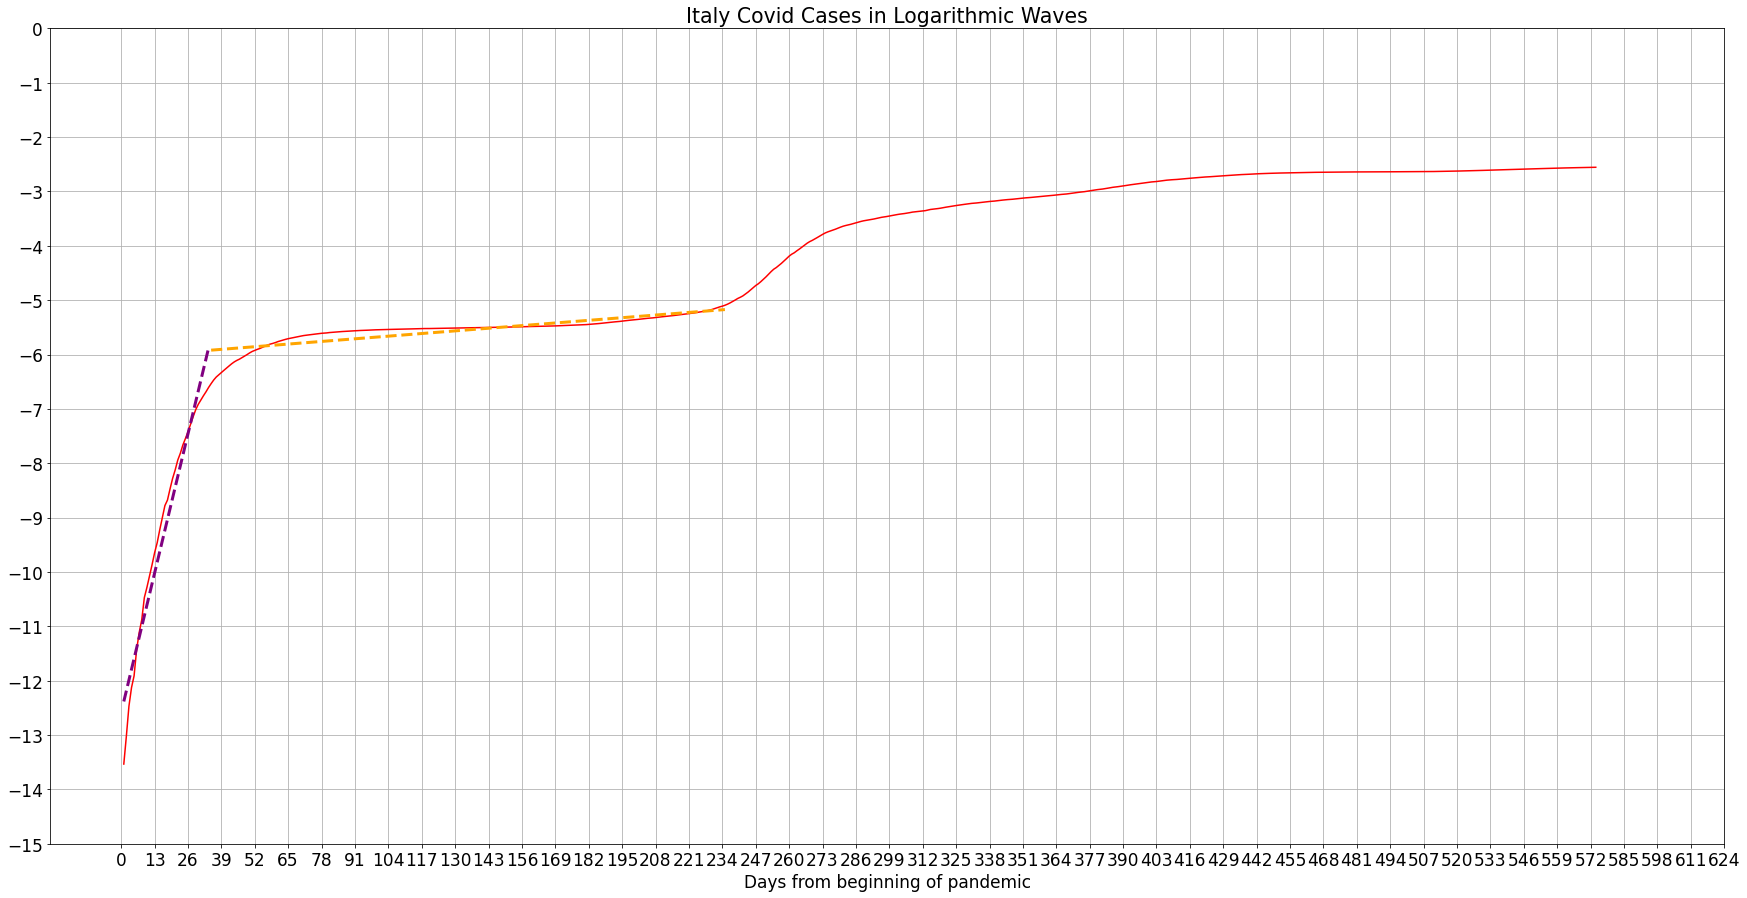

In [1016]:
plt.plot(x,y,color="red")
plt.plot(x_int1,y1,color="purple",linestyle="dashed",linewidth=3.0)
plt.plot(x_int2,y2,color="orange",linestyle="dashed",linewidth=3.0)
#plt.plot(x_int3,y3,color="red",linestyle="dashed",linewidth=3.0)
#plt.plot(x_int4,y4,color="green",linestyle="dashed",linewidth=3.0)

#plt.xaxis.set_ticks(np.arange(0,625,13))
#plt.yaxis.set_ticks
plt.xticks(np.arange(0,625,13))
plt.yticks(np.arange(-15,1,1))
plt.title('Italy Covid Cases in Logarithmic Waves')
plt.xlabel('Days from beginning of pandemic')
plt.rcParams['figure.figsize'] = [30,15]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

In [1017]:
waveEnd = 234
b=0.1
a1= r1+b
print(a1)

0.2970057044682587


In [1018]:
print(x_int1)
print(r1)
print(c1)

print(r1*x[33]+c1)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34]
0.1970057044682587
-12.57845966574984
-5.8802657138290435


In [1019]:
from scipy.special import expit
obv_y = ita_norm_case[:34]
#linreg_y = [0] *34

linreg1 = c1 + r1 * x_int1
expit(linreg1)
exp_y = np.exp(linreg1)
print(exp_y)

[4.19568492e-06 5.10929945e-06 6.22185445e-06 7.57666940e-06
 9.22649664e-06 1.12355754e-05 1.36821330e-05 1.66614310e-05
 2.02894741e-05 2.47075271e-05 3.00876155e-05 3.66392235e-05
 4.46174505e-05 5.43329445e-05 6.61639967e-05 8.05712724e-05
 9.81157465e-05 1.19480547e-04 1.45497554e-04 1.77179790e-04
 2.15760865e-04 2.62743006e-04 3.19955555e-04 3.89626193e-04
 4.74467681e-04 5.77783487e-04 7.03596412e-04 8.56805225e-04
 1.04337541e-03 1.27057143e-03 1.54723962e-03 1.88415257e-03
 2.29442866e-03 2.79404276e-03]


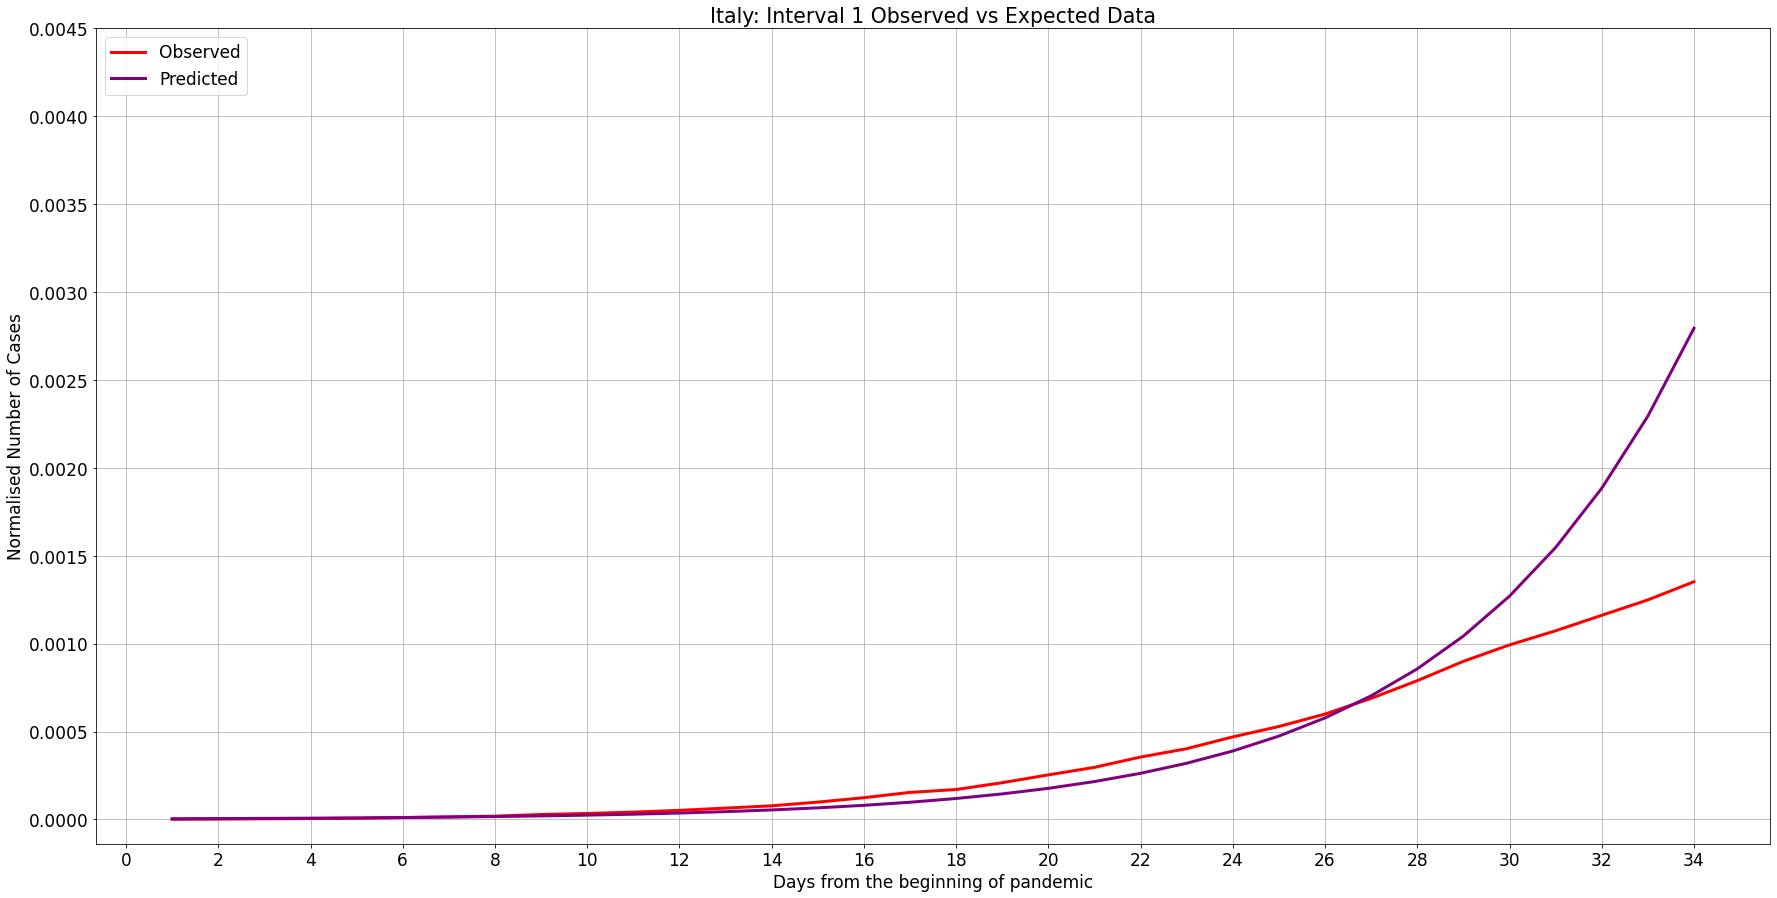

In [1020]:
plt.plot(x_int1,obv_y,color="red",linewidth=3.0,label = "Observed")
plt.plot(x_int1,exp_y,color="purple",linewidth=3.0,label = "Predicted")

#plt.xaxis.set_ticks(np.arange(0,625,13))
#plt.yaxis.set_ticks
plt.xticks(np.arange(0,35,2))
plt.yticks(np.arange(0,0.005,0.0005))
plt.title('Italy: Interval 1 Observed vs Expected Data')
plt.xlabel('Days from the beginning of pandemic')
plt.ylabel('Normalised Number of Cases')
plt.rcParams['figure.figsize'] = [28,12]
plt.rcParams.update({'font.size': 17})
plt.legend(loc = "upper left")
plt.grid()
plt.show()

In [1021]:
day_10_ita = ita['Cumulative_cases'][42]
R0 = day_10_ita / ita_pop
print(R0)
I0 = ita_new['Cumulative_cases'][1]/tur_pop - R0
print(I0)
S0 = 1- I0 - R0
print(S0)
Sign = S0
print(Sign)
Sres = 0
Sexh = 1 - (Sign + Sres + I0 + R0)

5.0377833753148615e-08
8.863070132945156e-07
0.9999990633151529
0.9999990633151529


In [1022]:
print(x_int1)
k2 = 1
k3 = 1/50
k6 = 1/100

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34]


In [1023]:
def equations(t, y,a,b,k2,k3,k6):
    # Y[0] = S(t)
    # Y[1] = R(t)
    #Sexh = 1 -y[0]-y[1] - y[2] - y[3]
    
    dSigndt = -a * y[0] * y[3] - k2 * y[0] * y[3] + k6 * y[2]
    dSresdt = k2 * y[0] * y[3] - k3 * y[1]
    dSexhdt = k3 * y[1] - a * y[2] * y[3] -k6 * y[2]
    
    dIdt = a * y[0] * y[3] + a * y[2] * y[3] - b * y[3]
    dRdt = b * y[3]
    
    return [dSigndt, dSresdt,dSexhdt, dIdt, dRdt]
inp = ita_norm_case[:34]

In [1024]:
from scipy.integrate import solve_ivp
sol = solve_ivp(equations, [1, inp.shape[0]], [Sign, Sres,Sexh, I0, R0],args=(a1,b,k2,k3,k6), t_eval=x_int1)
sol.y

array([[9.99999063e-01, 9.99997793e-01, 9.99996245e-01, 9.99994363e-01,
        9.99992070e-01, 9.99989277e-01, 9.99985671e-01, 9.99980891e-01,
        9.99975202e-01, 9.99968734e-01, 9.99961460e-01, 9.99953193e-01,
        9.99943590e-01, 9.99932145e-01, 9.99918197e-01, 9.99900924e-01,
        9.99879347e-01, 9.99852326e-01, 9.99818565e-01, 9.99776606e-01,
        9.99724834e-01, 9.99661476e-01, 9.99584600e-01, 9.99492112e-01,
        9.99380171e-01, 9.99244164e-01, 9.99079776e-01, 9.98880683e-01,
        9.98638550e-01, 9.98343030e-01, 9.97981764e-01, 9.97540382e-01,
        9.97002502e-01, 9.96349729e-01],
       [0.00000000e+00, 9.70343637e-07, 2.13270780e-06, 3.52877779e-06,
        5.21076707e-06, 7.24166501e-06, 9.84242287e-06, 1.32646962e-05,
        1.73243288e-05, 2.19291318e-05, 2.70984149e-05, 3.29629859e-05,
        3.97651510e-05, 4.78587147e-05, 5.77089800e-05, 6.98927480e-05,
        8.50983183e-05, 1.04125489e-04, 1.27885556e-04, 1.57401313e-04,
        1.93807055e-04,

In [1025]:
#p = 1 - sol.y[0, :]
p = sol.y[3] + sol.y[4]
MSE = np.mean(np.square(p - inp))
#p_df = pd.DataFrame(p, columns="Value")

print(p)
#print(inp.values)
#print(ita_norm_case[:34])

[9.36684847e-07 1.22768183e-06 1.58202379e-06 2.01333808e-06
 2.53869665e-06 3.17869714e-06 4.00564078e-06 5.10188483e-06
 6.40713387e-06 7.89118666e-06 9.56032896e-06 1.14573335e-05
 1.36614602e-05 1.62884556e-05 1.94905535e-05 2.34564748e-05
 2.84114270e-05 3.46171051e-05 4.23716907e-05 5.20098526e-05
 6.39027465e-05 7.84580151e-05 9.61197881e-05 1.17368682e-04
 1.43088546e-04 1.74338805e-04 2.12110929e-04 2.57858024e-04
 3.13495984e-04 3.81403487e-04 4.64421997e-04 5.65855763e-04
 6.89471819e-04 8.39499985e-04]


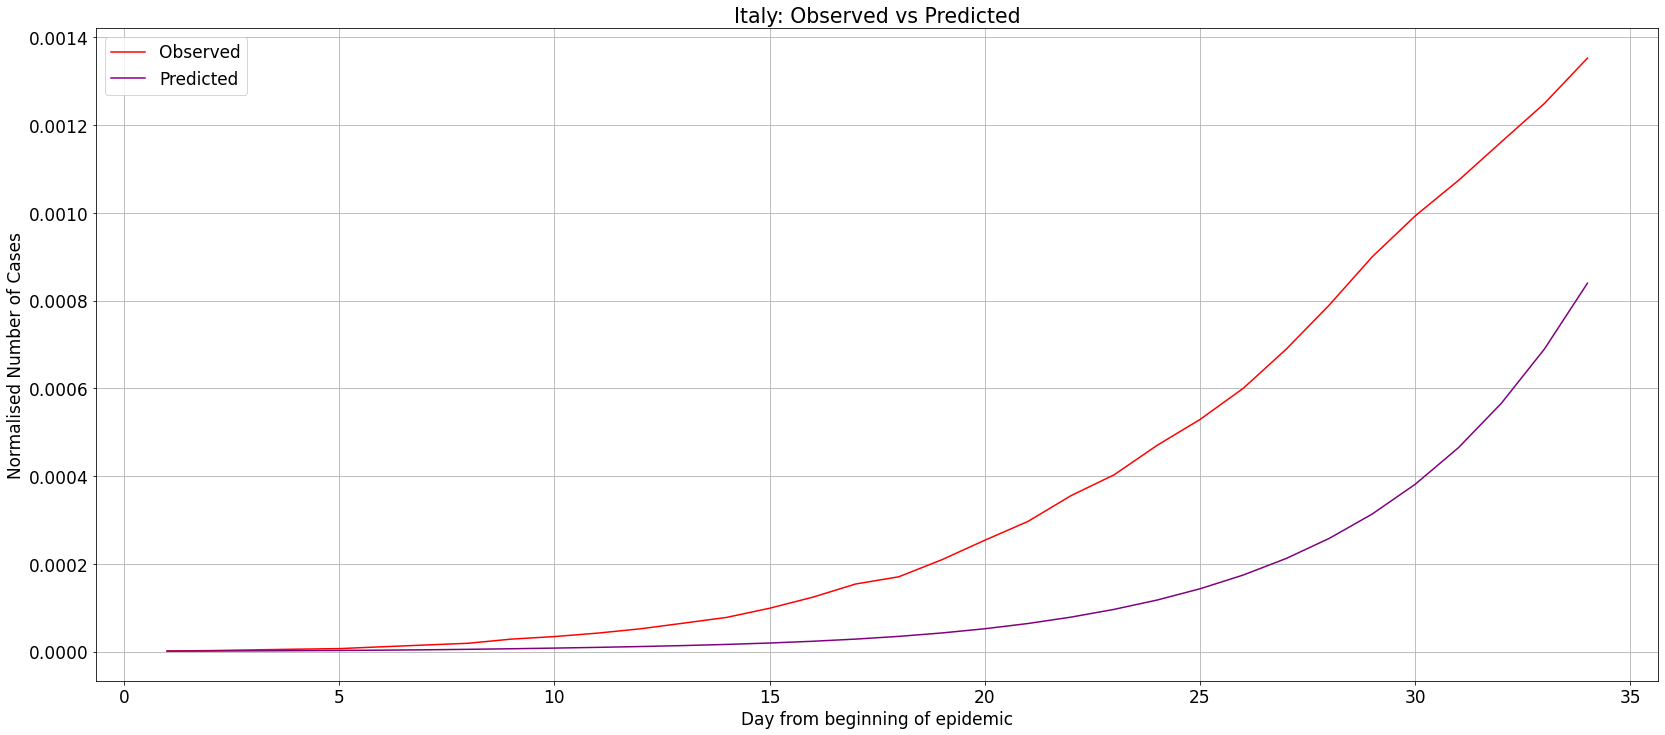

In [1026]:
plt.figure()
plt.plot(x_int1,ita_norm_case[:34],color="red", label = 'Observed')
plt.plot(x_int1, p, color="purple",label = 'Predicted')
#plt.xticks(np.arange(0,35,2))
plt.xlabel('Day from beginning of epidemic')
plt.ylabel('Normalised Number of Cases')
plt.title('Italy: Observed vs Predicted')
plt.legend(loc="upper left")
plt.rcParams['figure.figsize'] = [28,12]
plt.rcParams.update({'font.size': 17})
plt.legend(loc="upper left")
plt.grid()
plt.show()

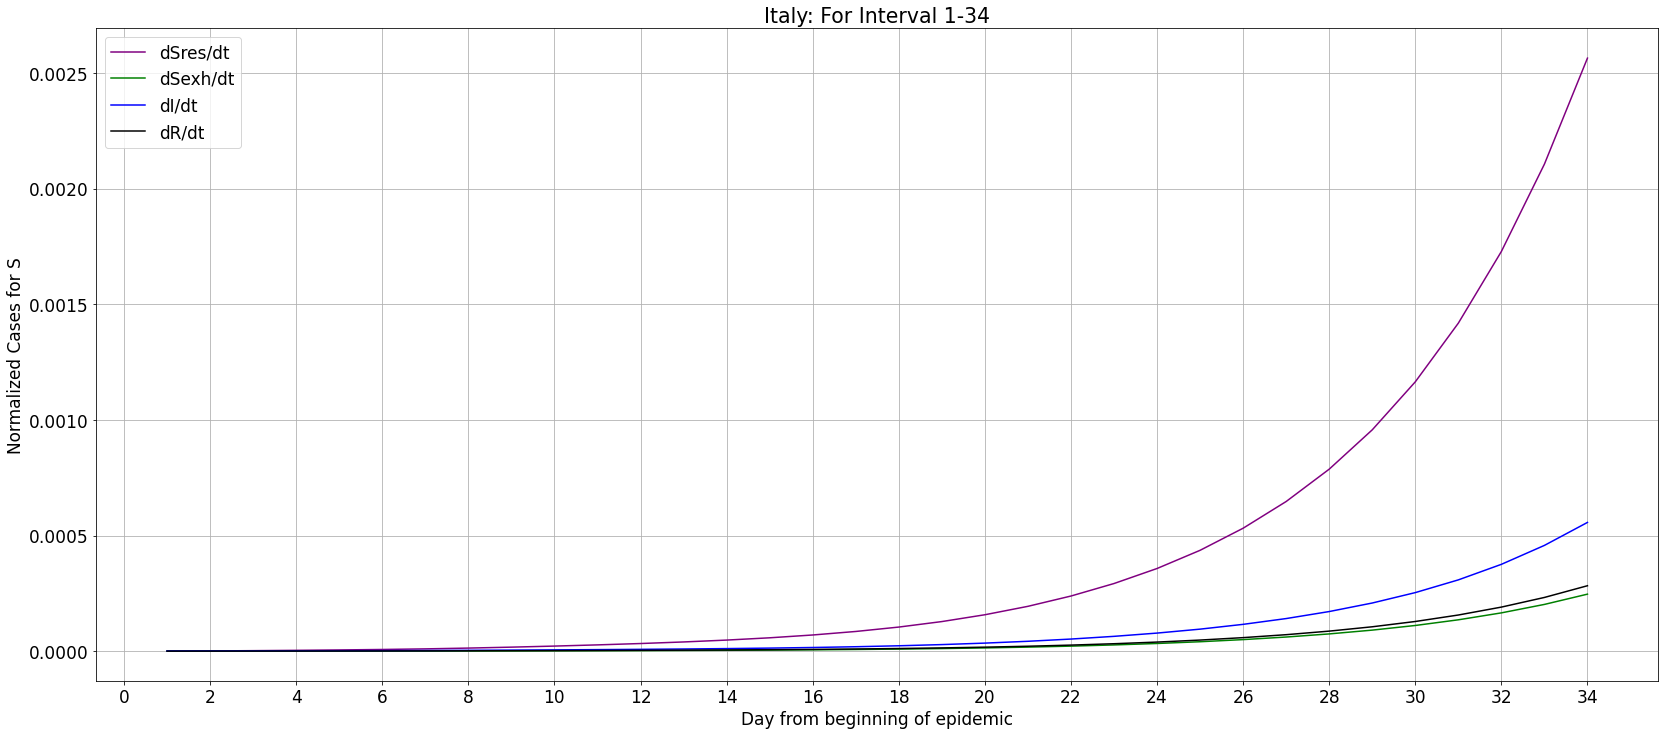

In [1027]:
plt.figure()
#plt.plot(x_int1,sol.y[0],color="red", label = 'dSign/dt')
plt.plot(x_int1,sol.y[1], color="purple",label = 'dSres/dt')
plt.plot(x_int1,sol.y[2], color="green",label = 'dSexh/dt')
plt.plot(x_int1,sol.y[3], color="blue",label = 'dI/dt')
plt.plot(x_int1,sol.y[4], color="black",label = 'dR/dt')
plt.xticks(np.arange(0,35,2))
#plt.yticks(np.arange(-0.1,1.05,0.005))
plt.xlabel('Day from beginning of epidemic')
plt.ylabel('Normalized Cases for S')
plt.title('Italy: For Interval 1-34')
plt.legend(loc="upper left")
plt.rcParams['figure.figsize'] = [28,12]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

Modified Model with k2 = 0.05

In [1028]:
k2 = 0.05
sol = solve_ivp(equations, [1, inp.shape[0]], [Sign, Sres,Sexh, I0, R0],args=(a1,b,k2,k3,k6), t_eval=x_int1)

In [1029]:
p = sol.y[3] + sol.y[4]
MSE = np.mean(np.square(p - inp))
#p_df = pd.DataFrame(p, columns="Value")

print(p)

[9.36684847e-07 1.22769821e-06 1.58222506e-06 2.01332423e-06
 2.53794833e-06 3.17731525e-06 3.95690816e-06 4.90647547e-06
 6.59311390e-06 9.44818877e-06 1.29917363e-05 1.68415208e-05
 2.07195271e-05 2.44519602e-05 2.79692458e-05 3.13060300e-05
 3.46011793e-05 3.80977807e-05 4.21431415e-05 4.71887896e-05
 5.37904735e-05 6.26081616e-05 7.44060434e-05 9.00525284e-05
 1.10520247e-04 1.36886049e-04 1.70331006e-04 2.12140409e-04
 2.63703771e-04 3.26514822e-04 4.02171518e-04 4.92376029e-04
 5.99803603e-04 7.30362645e-04]


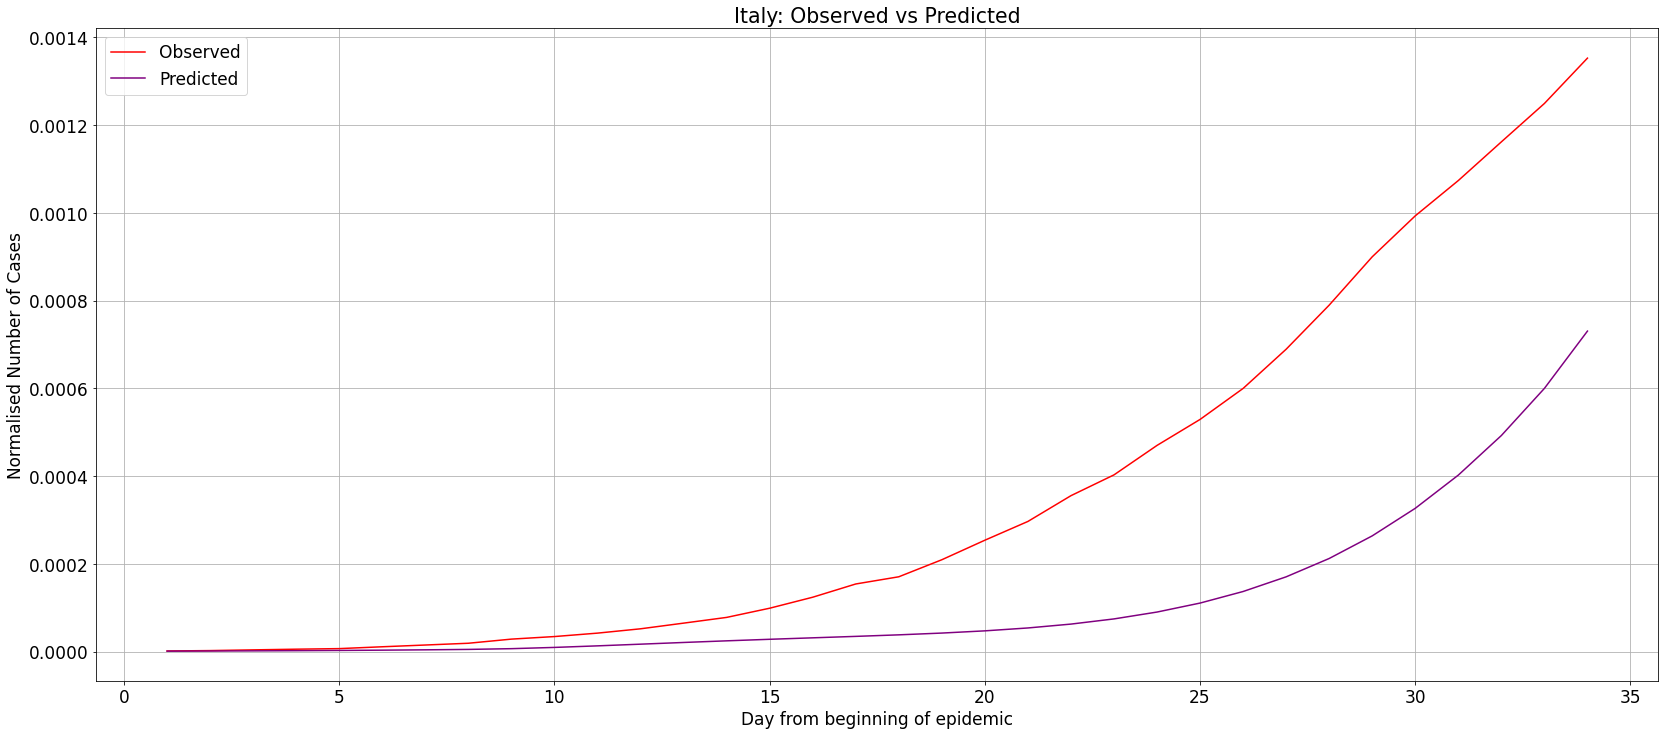

In [1030]:
plt.figure()
plt.plot(x_int1,ita_norm_case[:34],color="red", label = 'Observed')
plt.plot(x_int1, p, color="purple",label = 'Predicted')
#plt.xticks(np.arange(0,35,2))
plt.xlabel('Day from beginning of epidemic')
plt.ylabel('Normalised Number of Cases')
plt.title('Italy: Observed vs Predicted')
plt.legend(loc="upper left")
plt.rcParams['figure.figsize'] = [28,12]
plt.rcParams.update({'font.size': 17})
plt.legend(loc="upper left")
plt.grid()
plt.show()

Crowd Effect

In [1031]:
k2 = 1
Ip = 0.02
q = k2/Ip
rate = q * Sign * Ip**2
print(rate)
print(q)
print(x_int1)

0.01999998126630306
50.0
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34]


In [1032]:
def equat_rate(t, y,a,b,rate,k3,k6):
    # Y[0] = S(t)
    # Y[1] = R(t)
    #Sexh = 1 -y[0]-y[1] - y[2] - y[3]
    
    dSigndt = -a * y[0] * y[3] - rate + k6 * y[2]
    dSresdt = rate - k3 * y[1]
    dSexhdt = k3 * y[1] - a * y[2] * y[3] -k6 * y[2]
    
    dIdt = a * y[0] * y[3] + a * y[2] * y[3] - b * y[3]
    dRdt = b * y[3]
    
    return [dSigndt, dSresdt,dSexhdt, dIdt, dRdt]
inp = ita_norm_case[:34]


In [1033]:
from scipy.integrate import solve_ivp
sol = solve_ivp(equat_rate, [1, inp.shape[0]], [Sign, Sres,Sexh, I0, R0],args=(a1,b,rate,k3,k6), t_eval=x_int1)
sol.y

array([[9.99999063e-01, 9.79999457e-01, 9.60003729e-01, 9.40015692e-01,
        9.20039048e-01, 9.00077386e-01, 8.80134219e-01, 8.60213101e-01,
        8.40317230e-01, 8.20449671e-01, 8.00613417e-01, 7.80811384e-01,
        7.61046412e-01, 7.41321266e-01, 7.21638636e-01, 7.02001134e-01,
        6.82411299e-01, 6.62871593e-01, 6.43384404e-01, 6.23952042e-01,
        6.04576743e-01, 5.85260667e-01, 5.66005899e-01, 5.46814447e-01,
        5.27688217e-01, 5.08628963e-01, 4.89638444e-01, 4.70718367e-01,
        4.51870382e-01, 4.33096084e-01, 4.14397010e-01, 3.95774641e-01,
        3.77230400e-01, 3.58765654e-01],
       [0.00000000e+00, 1.98013087e-02, 3.92105270e-02, 5.82354151e-02,
        7.68835831e-02, 9.51624928e-02, 1.13079492e-01, 1.30641943e-01,
        1.47856796e-01, 1.64730829e-01, 1.81270713e-01, 1.97483006e-01,
        2.13374159e-01, 2.28950509e-01, 2.44218285e-01, 2.59183604e-01,
        2.73852473e-01, 2.88230789e-01, 3.02324339e-01, 3.16138799e-01,
        3.29679733e-01,

In [1034]:
#p = 1 - sol.y[0, :]
p = sol.y[3] + sol.y[4]
MSE = np.mean(np.square(p - inp))
#p_df = pd.DataFrame(p, columns="Value")

print(p)
#print(inp.values)
#print(ita_norm_case[:34])

[9.36684847e-07 1.22435214e-06 1.56564927e-06 1.96832867e-06
 2.44076365e-06 2.99192621e-06 3.62967486e-06 4.35416984e-06
 5.17933625e-06 6.12114616e-06 7.19481266e-06 8.41478976e-06
 9.79477244e-06 1.13476966e-05 1.30857393e-05 1.50203181e-05
 1.71620921e-05 1.95209610e-05 2.21060654e-05 2.49257871e-05
 2.79877487e-05 3.12988139e-05 3.48650872e-05 3.86919141e-05
 4.27841055e-05 4.71454827e-05 5.17770617e-05 5.66781089e-05
 6.18462188e-05 6.72773146e-05 7.29656478e-05 7.89037982e-05
 8.50826743e-05 9.14915126e-05]


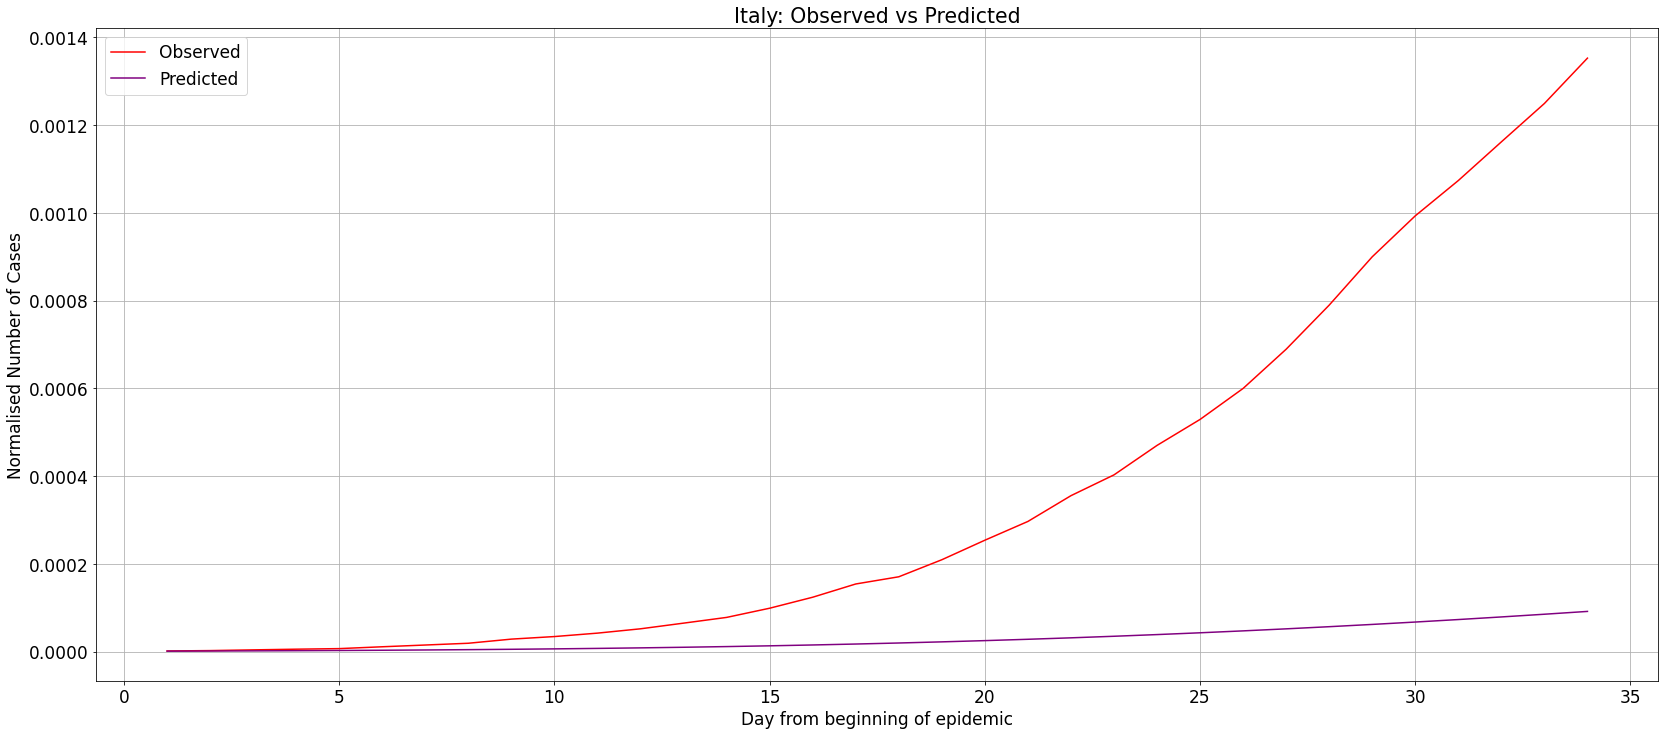

In [1035]:
plt.figure()
plt.plot(x_int1,ita_norm_case[:34],color="red", label = 'Observed')
plt.plot(x_int1, p, color="purple",label = 'Predicted')
#plt.xticks(np.arange(0,35,2))
plt.xlabel('Day from beginning of epidemic')
plt.ylabel('Normalised Number of Cases')
plt.title('Italy: Observed vs Predicted')
plt.legend(loc="upper left")
plt.rcParams['figure.figsize'] = [28,12]
plt.rcParams.update({'font.size': 17})
plt.legend(loc="upper left")
plt.grid()
plt.show()

## Interval 2: 34 - 235

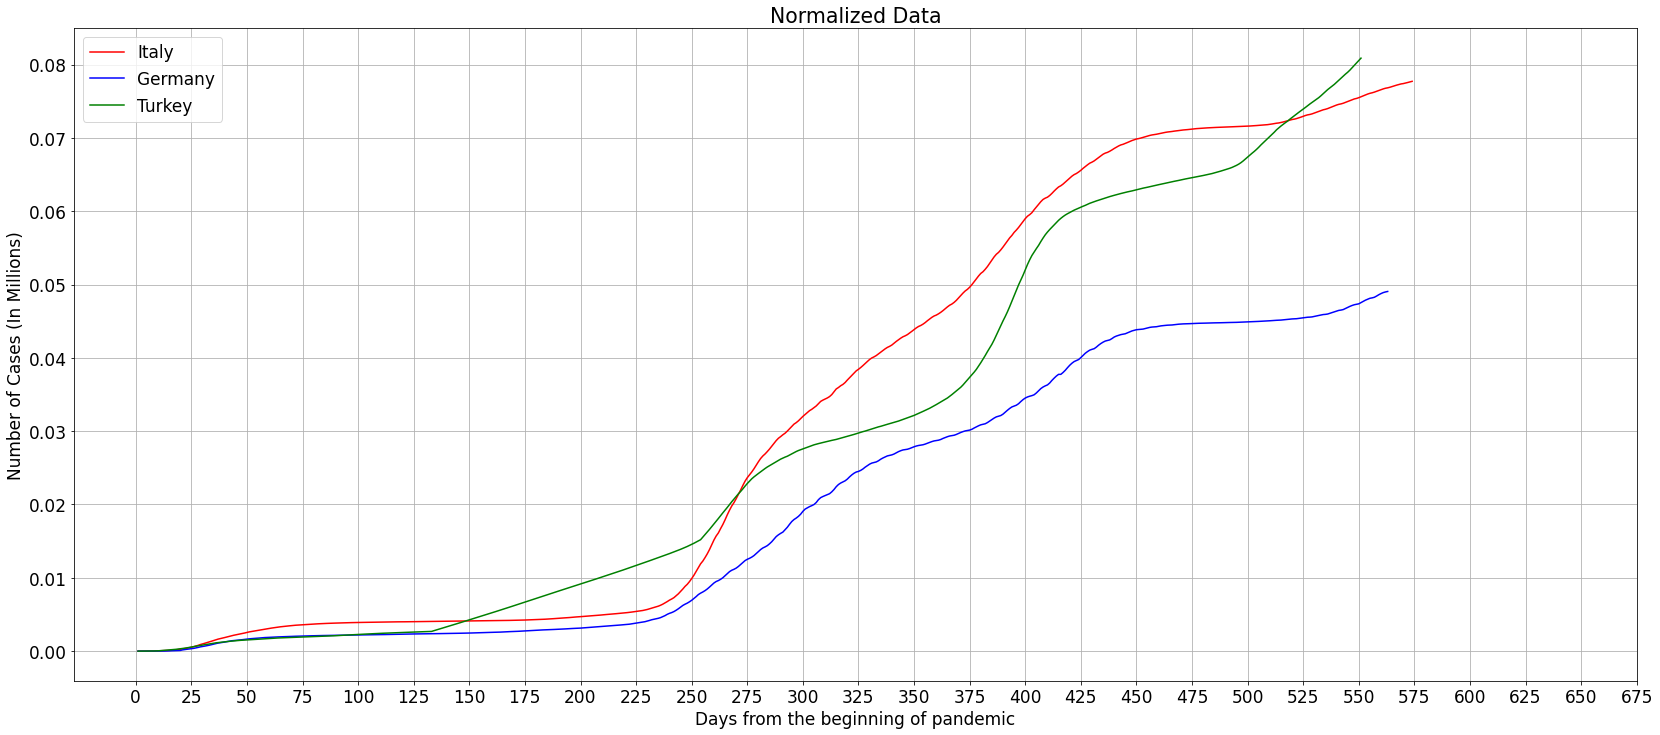

In [1036]:
x1 = ita_new.index.values
y1 = ita_new['Cumulative_cases']/ita_pop
x2 = ger_new.index.values
y2 = ger_new['Cumulative_cases']/ger_pop
x3 = tur_new.index.values
y3 = tur_new['Cumulative_cases']/tur_pop

plt.plot(x1,y1, color="red", label = 'Italy')
plt.plot(x2,y2, color="blue", label = 'Germany')
plt.plot(x3,y3, color="green", label = 'Turkey')
#plt.yticks(np.arange(0, 7000000, 200000))
plt.xticks(np.arange(0,700,25))
plt.xlabel('Days from the beginning of pandemic')
plt.ylabel('Number of Cases (In Millions)')
plt.title('Normalized Data')
plt.legend(loc="upper left")
plt.rcParams['figure.figsize'] = [25,15]
plt.rcParams.update({'font.size': 18})
plt.grid()
plt.show()

In [1037]:
#Interval 2
obv_y = ita_norm_case[34:235]
linreg2 = c2 + r2 * x_int2
expit(linreg2)
exp_y = np.exp(linreg2)
print(exp_y)

[0.00268762 0.00269768 0.00270777 0.0027179  0.00272807 0.00273827
 0.00274851 0.0027588  0.00276912 0.00277948 0.00278988 0.00280031
 0.00281079 0.0028213  0.00283186 0.00284245 0.00285309 0.00286376
 0.00287447 0.00288523 0.00289602 0.00290685 0.00291773 0.00292864
 0.0029396  0.0029506  0.00296164 0.00297272 0.00298384 0.002995
 0.0030062  0.00301745 0.00302874 0.00304007 0.00305144 0.00306286
 0.00307432 0.00308582 0.00309736 0.00310895 0.00312058 0.00313225
 0.00314397 0.00315573 0.00316754 0.00317939 0.00319128 0.00320322
 0.0032152  0.00322723 0.00323931 0.00325142 0.00326359 0.0032758
 0.00328805 0.00330035 0.0033127  0.00332509 0.00333753 0.00335002
 0.00336255 0.00337513 0.00338776 0.00340043 0.00341315 0.00342592
 0.00343874 0.0034516  0.00346451 0.00347747 0.00349048 0.00350354
 0.00351665 0.0035298  0.00354301 0.00355626 0.00356957 0.00358292
 0.00359632 0.00360978 0.00362328 0.00363684 0.00365044 0.0036641
 0.00367781 0.00369157 0.00370538 0.00371924 0.00373315 0.00374712

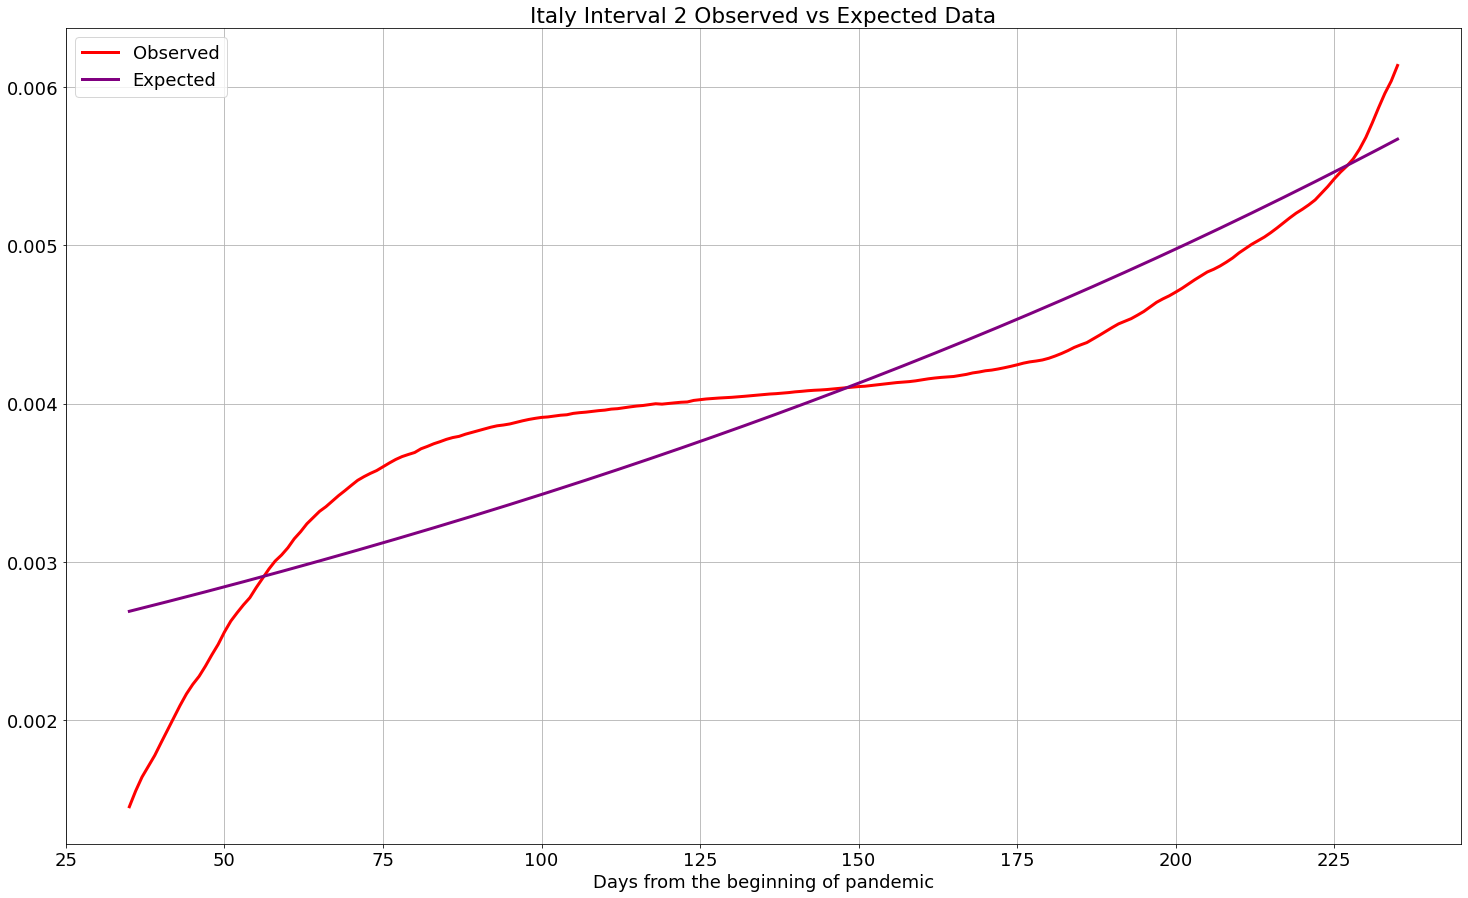

In [1038]:
plt.plot(x_int2,obv_y,color="red",linewidth=3.0, label = "Observed")
plt.plot(x_int2,exp_y,color="purple",linewidth=3.0, label = "Expected")

#plt.xaxis.set_ticks(np.arange(0,625,13))
#plt.yaxis.set_ticks
#plt.xticks(np.arange(0,35,2))
#plt.yticks(np.arange(0,0.005,0.0005))
plt.title('Italy Interval 2 Observed vs Expected Data')
plt.xlabel('Days from the beginning of pandemic')
plt.legend(loc="upper left")
plt.rcParams['figure.figsize'] = [28,12]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

In [1039]:
day_10_ita = ita_new['Cumulative_cases'][25]
R1 = day_10_ita / ita_pop
print(R1)
I1 = ita_new['Cumulative_cases'][35]/ita_pop - R1
print(I1)
S1 = 1- I1 - R1
print(S1)
Sign = S1
print(Sign)
Sres = 0
Sexh = 1- (Sign +Sres + I1 + R1)

0.0005290680100755667
0.0009234592779177162
0.9985474727120067
0.9985474727120067


In [1040]:
b=0.1
a2= r2+b
print(a2)

0.10373405017328197


In [1041]:
def equations(t, y,a,b,rate,k3,k6):
    # Y[0] = S(t)
    # Y[1] = R(t)
    #Sexh = 1 -y[0]-y[1] - y[2] - y[3]
    
    dSigndt = -a * y[0] * y[3] - k2 * y[0] * y[3] + k6 * y[2]
    dSresdt = k2 * y[0] * y[3]- k3 * y[1]
    dSexhdt = k3 * y[1] - a * y[2] * y[3] -k6 * y[2]
    
    dIdt = a * y[0] * y[3] + a * y[2] * y[3] - b * y[3]
    dRdt = b * y[3]
    
    return [dSigndt, dSresdt,dSexhdt, dIdt, dRdt]

inp = ita_norm_case[34:235]

In [1042]:
sol = solve_ivp(equations, [1, inp.shape[0]], [Sign,Sres,Sexh, I1, R1], args = (a2,b,k2,k3,k6), t_eval= x_int2-34)


In [1043]:
#p = 1 - sol.y[0, :]
p = sol.y[3] + sol.y[4]
MSE = np.mean(np.square(p - inp))

print(a2,MSE)
print(p)


0.10373405017328197 7.00415503043606e-05
[0.00145253 0.0015483  0.00164432 0.00174056 0.00183702 0.0019337
 0.00203059 0.00212767 0.00222494 0.0023224  0.00242003 0.00251783
 0.0026158  0.00271391 0.00281218 0.00291058 0.00300912 0.00310778
 0.00320657 0.00330546 0.00340447 0.00350357 0.00360277 0.00370206
 0.00380143 0.00390088 0.0040004  0.00409998 0.00419962 0.00429931
 0.00439906 0.00449884 0.00459866 0.00469852 0.0047984  0.0048983
 0.00499821 0.00509814 0.00519807 0.005298   0.00539793 0.00549785
 0.00559776 0.00569765 0.00579751 0.00589735 0.00599715 0.00609692
 0.00619665 0.00629633 0.00639597 0.00649556 0.0065951  0.00669457
 0.00679399 0.00689334 0.00699263 0.00709184 0.00719099 0.00729005
 0.00738903 0.00748794 0.00758675 0.00768548 0.00778411 0.00788265
 0.00798109 0.00807943 0.00817767 0.0082758  0.00837383 0.00847174
 0.00856954 0.00866722 0.00876479 0.00886224 0.00895956 0.00905675
 0.00915382 0.00925076 0.00934757 0.00944424 0.00954078 0.00963718
 0.00973344 0.00982956 

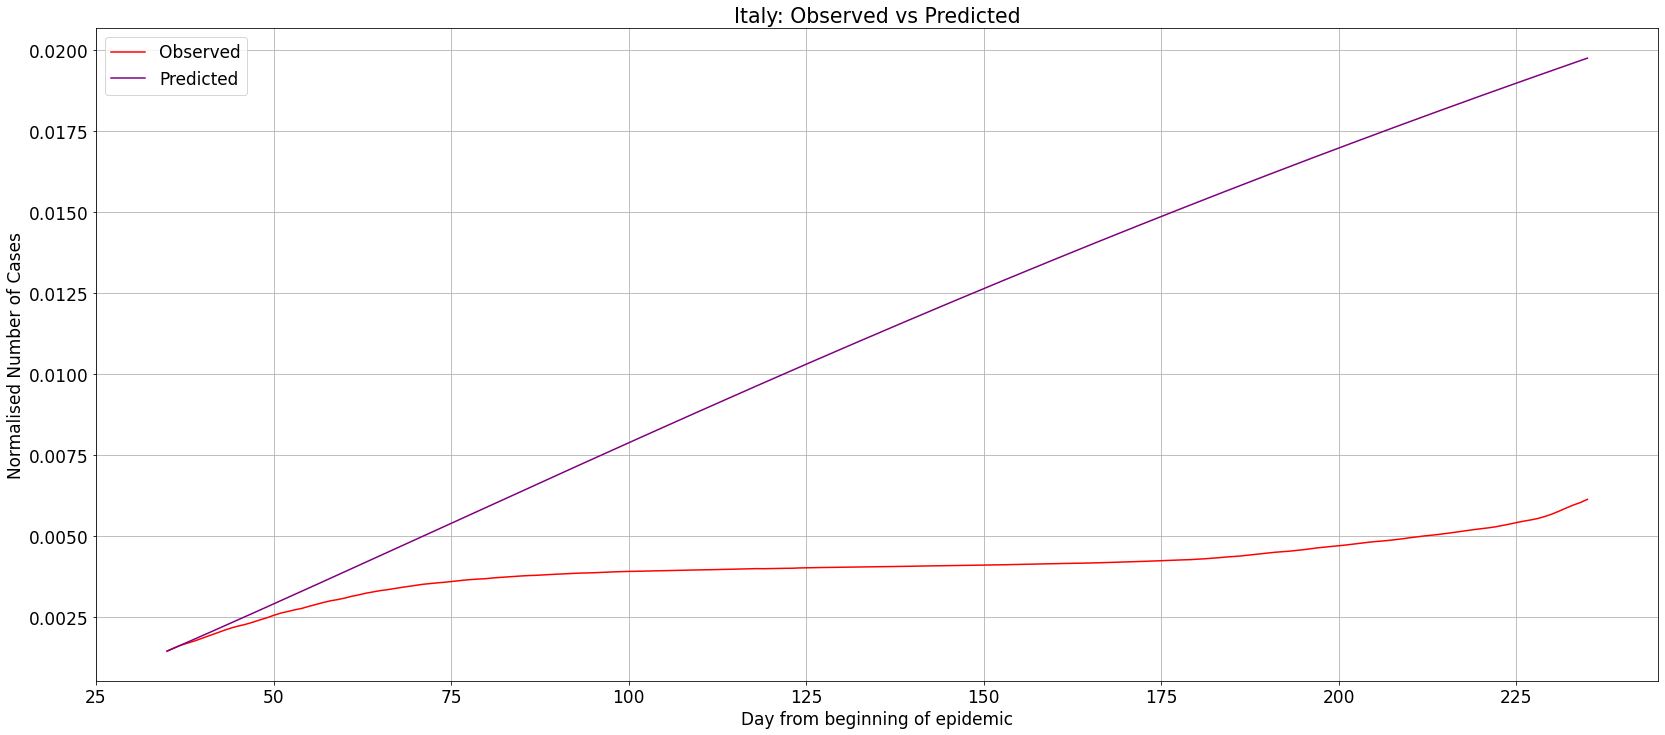

In [1044]:
plt.figure()
plt.plot(x_int2,ita_norm_case[34:235],color="red", label = 'Observed')
plt.plot(x_int2, p , color="purple",label = 'Predicted')
#plt.xticks(np.arange(25,235,5))
#plt.yticks(np.arange(0,0.03,0.002))
plt.xlabel('Day from beginning of epidemic')
plt.ylabel('Normalised Number of Cases')
plt.title('Italy: Observed vs Predicted')
plt.legend(loc="upper left")
plt.rcParams['figure.figsize'] = [28,12]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

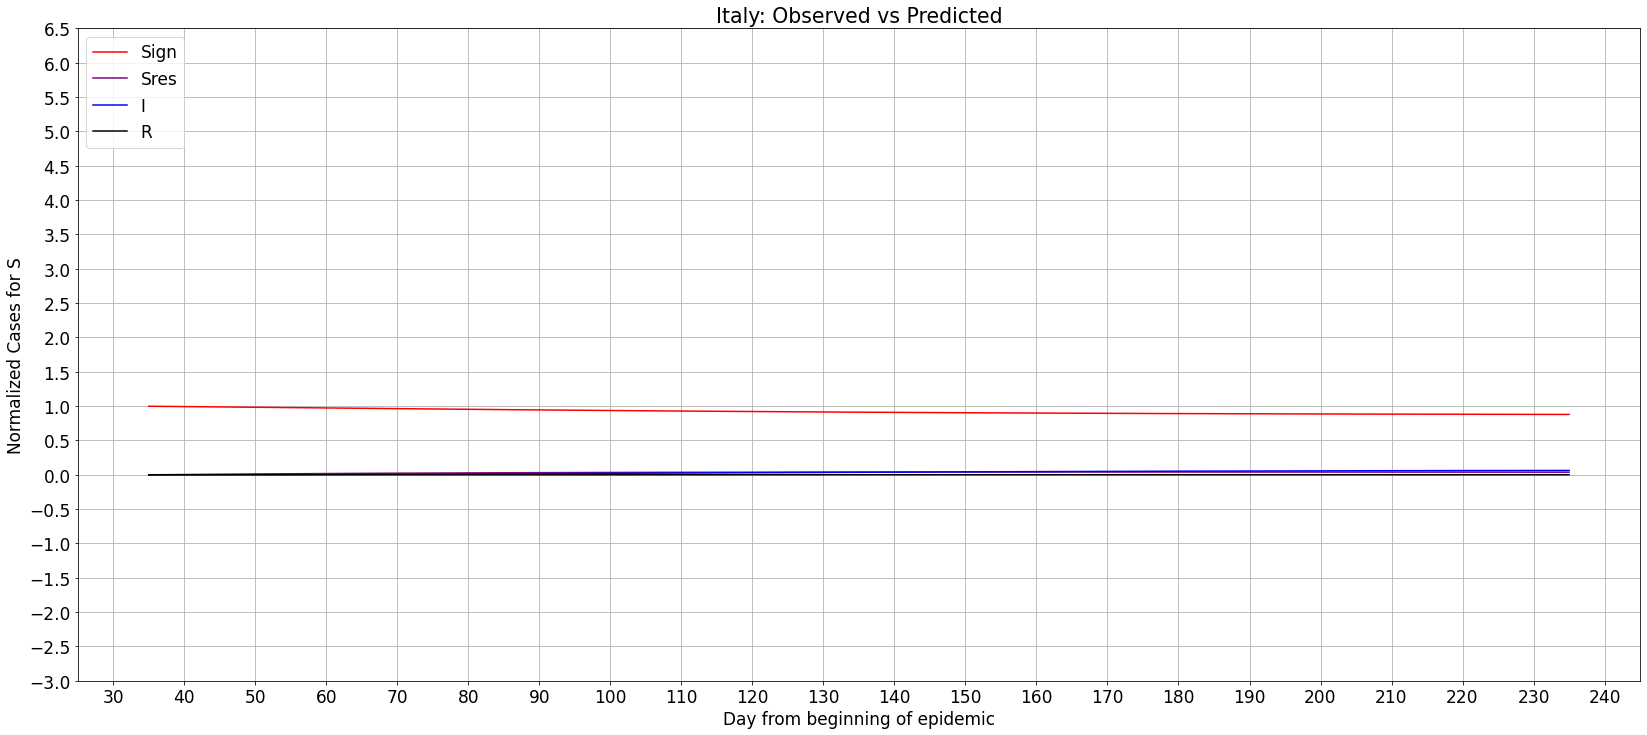

In [1045]:
plt.figure()
plt.plot(x_int2,sol.y[0],color="red", label = 'Sign')
plt.plot(x_int2,sol.y[1], color="purple",label = 'Sres')
#plt.plot(x_int1,dSexhdt, color="green",label = 'Sexh')
plt.plot(x_int2,sol.y[2], color="blue",label = 'I')
plt.plot(x_int2,sol.y[3], color="black",label = 'R')
plt.xticks(np.arange(30,250,10))
plt.yticks(np.arange(-3,7,0.5))
plt.xlabel('Day from beginning of epidemic')
plt.ylabel('Normalized Cases for S')
plt.title('Italy: Observed vs Predicted')
plt.legend(loc="upper left")
plt.rcParams['figure.figsize'] = [28,12]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

Modified Model

In [1046]:
k2 = 0.05
sol = solve_ivp(equations, [1, inp.shape[0]], [Sign,Sres,Sexh, I1, R1], args = (a2,b,k2,k3,k6), t_eval= x_int2-34)
sol.y[3]

array([0.00092346, 0.00092677, 0.00093007, 0.00093338, 0.00093668,
       0.00093998, 0.00094328, 0.00094658, 0.00094987, 0.00095316,
       0.00095645, 0.00095974, 0.00096303, 0.00096631, 0.00096959,
       0.00097286, 0.00097614, 0.00097941, 0.00098268, 0.00098594,
       0.00098921, 0.00099247, 0.00099572, 0.00099897, 0.00100222,
       0.00100547, 0.00100871, 0.00101195, 0.00101519, 0.00101842,
       0.00102164, 0.00102487, 0.00102809, 0.0010313 , 0.00103451,
       0.00103772, 0.00104092, 0.00104411, 0.00104731, 0.00105049,
       0.00105368, 0.00105685, 0.00106002, 0.00106319, 0.00106635,
       0.00106951, 0.00107266, 0.0010758 , 0.00107894, 0.00108208,
       0.0010852 , 0.00108833, 0.00109144, 0.00109455, 0.00109765,
       0.00110075, 0.00110384, 0.00110692, 0.00111   , 0.00111307,
       0.00111613, 0.00111919, 0.00112223, 0.00112527, 0.00112831,
       0.00113133, 0.00113435, 0.00113736, 0.00114037, 0.00114336,
       0.00114635, 0.00114933, 0.0011523 , 0.00115526, 0.00115

In [1047]:
p = sol.y[3] + sol.y[4]
MSE = np.mean(np.square(p - inp))

print(a2,MSE)
print(p)


0.10373405017328197 0.00012261407971949183
[0.00145253 0.00154835 0.0016445  0.00174097 0.00183778 0.00193491
 0.00203237 0.00213016 0.00222828 0.00232672 0.00242549 0.00252459
 0.00262402 0.00272376 0.00282384 0.00292424 0.00302496 0.00312601
 0.00322739 0.00332908 0.0034311  0.00353344 0.00363611 0.0037391
 0.00384241 0.00394604 0.00404999 0.00415426 0.00425885 0.00436376
 0.00446899 0.00457454 0.0046804  0.00478658 0.00489308 0.0049999
 0.00510703 0.00521448 0.00532224 0.00543032 0.00553871 0.00564741
 0.00575643 0.00586576 0.0059754  0.00608535 0.0061956  0.00630617
 0.00641705 0.00652824 0.00663973 0.00675153 0.00686363 0.00697604
 0.00708876 0.00720177 0.00731509 0.00742872 0.00754264 0.00765686
 0.00777139 0.00788621 0.00800133 0.00811674 0.00823246 0.00834847
 0.00846477 0.00858136 0.00869825 0.00881543 0.0089329  0.00905067
 0.00916872 0.00928705 0.00940568 0.00952459 0.00964379 0.00976327
 0.00988303 0.01000308 0.01012341 0.01024401 0.0103649  0.01048606
 0.0106075  0.0107292

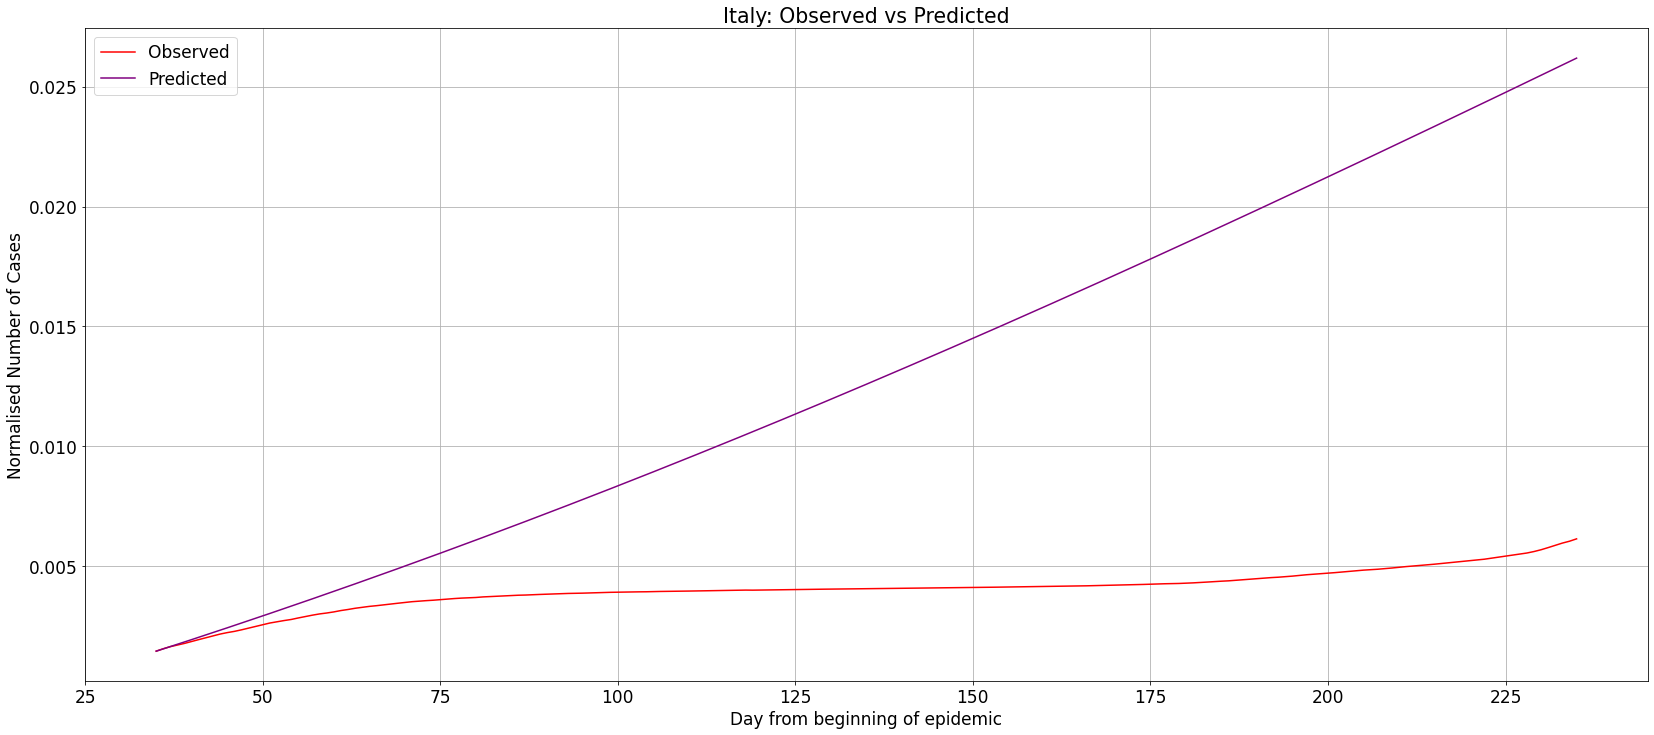

In [1048]:
plt.figure()
plt.plot(x_int2,ita_norm_case[34:235],color="red", label = 'Observed')
plt.plot(x_int2, p , color="purple",label = 'Predicted')
#plt.xticks(np.arange(25,245,5))
#plt.yticks(np.arange(0,0.03,0.002))
plt.xlabel('Day from beginning of epidemic')
plt.ylabel('Normalised Number of Cases')
plt.title('Italy: Observed vs Predicted')
plt.legend(loc="upper left")
plt.rcParams['figure.figsize'] = [28,12]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

Crowd Effect

In [1049]:
k2 = 1
Ip = 0.02
q = k2/Ip
rate = q * Sign * Ip**2
print(rate)
print(q)
print(x_int1)

0.019970949454240133
50.0
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34]


In [1050]:
def equat_rate(t, y,a,b,rate,k3,k6):
    # Y[0] = S(t)
    # Y[1] = R(t)
    #Sexh = 1 -y[0]-y[1] - y[2] - y[3]
    
    dSigndt = -a * y[0] * y[3] - rate + k6 * y[2]
    dSresdt = rate - k3 * y[1]
    dSexhdt = k3 * y[1] - a * y[2] * y[3] -k6 * y[2]
    
    dIdt = a * y[0] * y[3] + a * y[2] * y[3] - b * y[3]
    dRdt = b * y[3]
    
    return [dSigndt, dSresdt,dSexhdt, dIdt, dRdt]
inp = ita_norm_case[34:235]


In [1051]:
from scipy.integrate import solve_ivp
sol = solve_ivp(equat_rate, [1, inp.shape[0]], [Sign,Sres,Sexh, I1, R1], args = (a2,b,rate,k3,k6), t_eval= x_int2-34)
p = sol.y[3] + sol.y[4]
MSE = np.mean(np.square(p - inp))

print(a2,MSE)
print(p)
sol.y

0.10373405017328197 6.399190033927931e-07
[0.00145253 0.00154736 0.00164046 0.00173165 0.00182081 0.00190781
 0.00199254 0.0020749  0.00215476 0.00223207 0.00230682 0.00237897
 0.00244852 0.00251546 0.00257979 0.00264151 0.00270064 0.00275719
 0.0028112  0.00286268 0.00291169 0.00295827 0.00300246 0.00304433
 0.00308395 0.00312138 0.0031567  0.00318996 0.00322127 0.00325071
 0.00327837 0.00330434 0.0033287  0.00335152 0.00337288 0.00339287
 0.00341155 0.00342898 0.00344525 0.0034604  0.00347451 0.00348763
 0.00349982 0.00351114 0.00352162 0.00353133 0.00354031 0.0035486
 0.00355624 0.00356328 0.00356974 0.00357567 0.00358113 0.00358618
 0.00359083 0.00359511 0.00359904 0.00360263 0.00360592 0.00360891
 0.00361164 0.00361412 0.00361636 0.0036184  0.00362024 0.0036219
 0.00362341 0.00362477 0.00362602 0.00362715 0.00362819 0.00362916
 0.00363006 0.0036309  0.00363167 0.00363237 0.00363301 0.00363359
 0.00363412 0.00363459 0.00363502 0.0036354  0.00363573 0.00363603
 0.00363629 0.00363652

array([[ 9.98547473e-01,  9.78482354e-01,  9.58422946e-01, ...,
        -1.46677406e+00, -1.47188501e+00, -1.47694881e+00],
       [ 0.00000000e+00,  1.97725654e-02,  3.91536115e-02, ...,
         9.79507811e-01,  9.79884818e-01,  9.80254362e-01],
       [ 0.00000000e+00,  1.97716512e-04,  7.82986524e-04, ...,
         1.48362759e+00,  1.48836153e+00,  1.49305579e+00],
       [ 9.23459278e-04,  9.25816544e-04,  9.26287515e-04, ...,
         2.09656866e-07,  1.91527387e-07,  1.74196291e-07],
       [ 5.29068010e-04,  6.21547682e-04,  7.14168590e-04, ...,
         3.63845368e-03,  3.63847213e-03,  3.63848976e-03]])

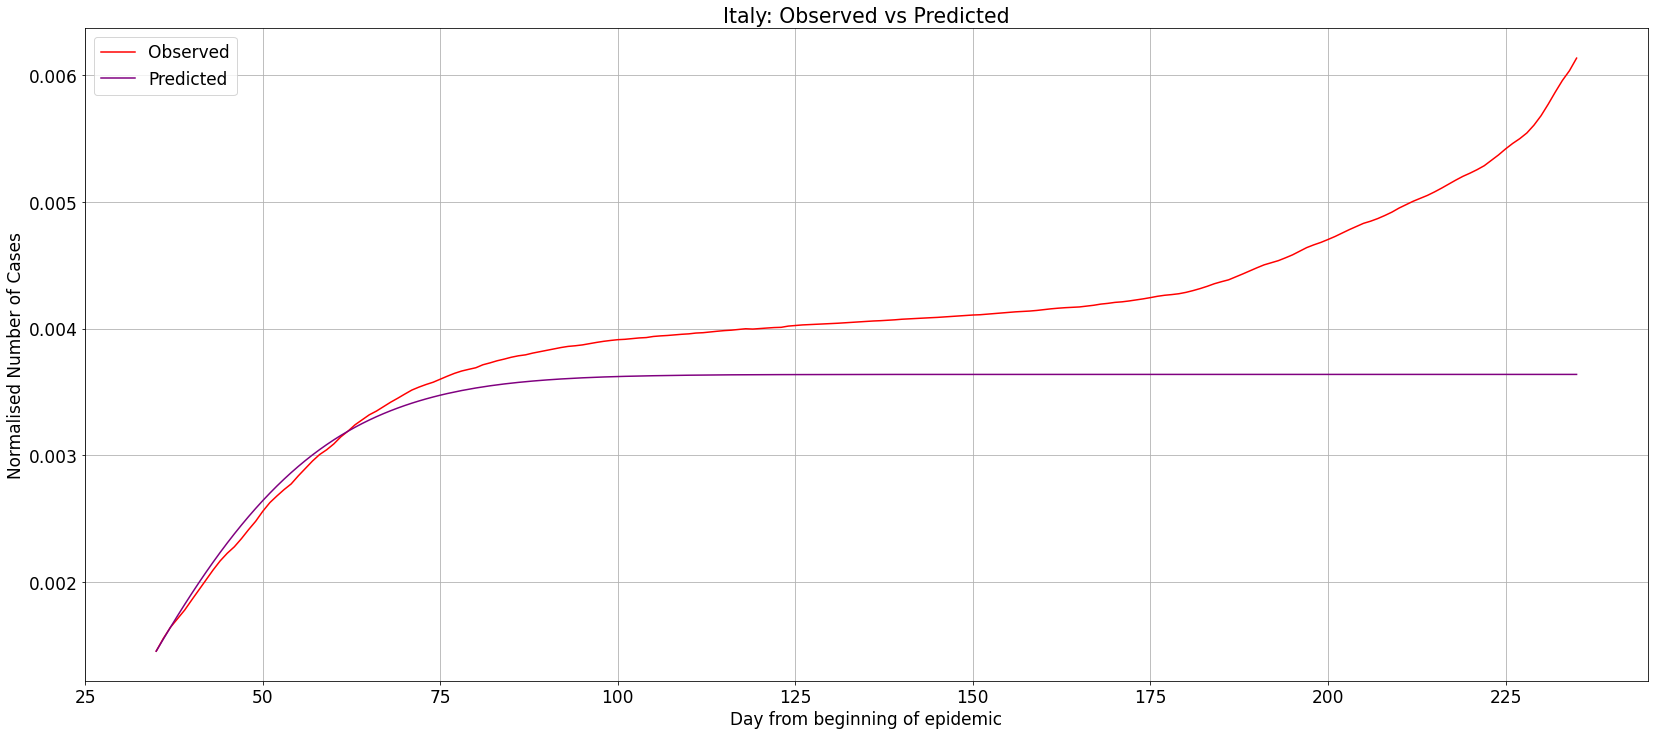

In [1052]:
plt.figure()
plt.plot(x_int2,ita_norm_case[34:235],color="red", label = 'Observed')
plt.plot(x_int2, p , color="purple",label = 'Predicted')
#plt.xticks(np.arange(25,245,5))
#plt.yticks(np.arange(0,0.03,0.002))
plt.xlabel('Day from beginning of epidemic')
plt.ylabel('Normalised Number of Cases')
plt.title('Italy: Observed vs Predicted')
plt.legend(loc="upper left")
plt.rcParams['figure.figsize'] = [28,12]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

Interval 3: 1 - 235

In [1053]:
obv_y = ita_norm_case[:235]
linreg3 = c3 + r3 * x_int3
expit(linreg3)
exp_y = np.exp(linreg3)

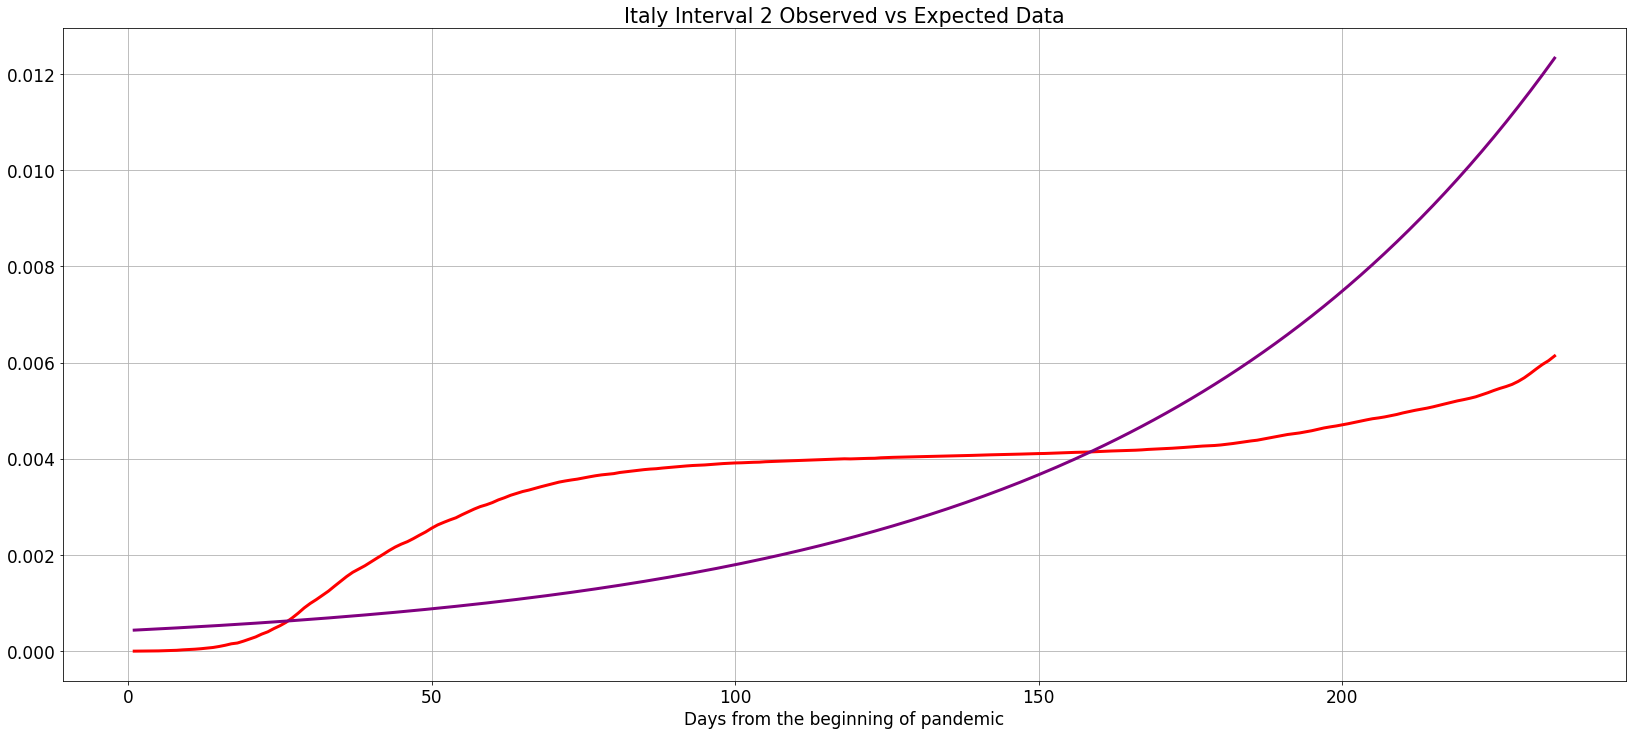

In [1054]:
plt.plot(x_int3,obv_y,color="red",linewidth=3.0)
plt.plot(x_int3,exp_y,color="purple",linewidth=3.0)

#plt.xaxis.set_ticks(np.arange(0,625,13))
#plt.yaxis.set_ticks
#plt.xticks(np.arange(0,35,2))
#plt.yticks(np.arange(0,0.005,0.0005))
plt.title('Italy Interval 2 Observed vs Expected Data')
plt.xlabel('Days from the beginning of pandemic')
plt.rcParams['figure.figsize'] = [28,12]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

In [1055]:
day_10_ita = ita['Cumulative_cases'][42]
R3 = day_10_ita / ita_pop
print(R3)
I3 = ita_new['Cumulative_cases'][1]/tur_pop - R3
print(I3)
S3 = 1- I3 - R3
print(S3)
Sign = S3
Sres = 1- Sign
Sexh = 1- (Sign +Sres +I3+R3)

5.0377833753148615e-08
8.863070132945156e-07
0.9999990633151529


In [1056]:
b=0.1
a3= r3+b
print(a3)

0.11426026154882764


In [1057]:
def equations(t, y,a,b,k2,k3,k6):
    # Y[0] = S(t)
    # Y[1] = R(t)
    #Sexh = 1 -y[0]-y[1] - y[2] - y[3]
    
    dSigndt = -a * y[0] * y[3] - k2 * y[0] * y[3] + k6 * y[2]
    dSresdt = k2 * y[0] * y[3] - k3 * y[1]
    dSexhdt = k3 * y[1] - a * y[2] * y[3] -k6 * y[2]
    
    dIdt = a * y[0] * y[3] + a * y[2] * y[3] - b * y[3]
    dRdt = b * y[3]
    
    return [dSigndt, dSresdt,dSexhdt ,dIdt, dRdt]
inp = ita_norm_case[:235]

In [1058]:
sol = solve_ivp(equations, [1, inp.shape[0]], [Sign,Sres,Sexh,I3,R3],args=(a3,b,k2,k3,k6), t_eval= x_int3)
sol.y

array([[ 9.99999063e-01,  9.99998059e-01,  9.99997042e-01, ...,
         9.98535094e-01,  9.98513905e-01,  9.98492419e-01],
       [ 9.36684847e-07,  1.80194618e-06,  2.66276666e-06, ...,
         7.03026291e-04,  7.13073577e-04,  7.23261918e-04],
       [-9.36684847e-07, -9.00092839e-07, -8.46690711e-07, ...,
         5.74582195e-04,  5.82956065e-04,  5.91446425e-04],
       [ 8.86307013e-07,  8.99036288e-07,  9.11948283e-07, ...,
         2.40706584e-05,  2.44139435e-05,  2.47620391e-05],
       [ 5.03778338e-08,  1.39643488e-07,  2.30191185e-07, ...,
         1.63226589e-04,  1.65651314e-04,  1.68110261e-04]])

In [1059]:
#p = 1 - sol.y[0, :]
#p= sol.y[0] + sol.y[1] + sol.y[2]+sol.y[3] +sol.y[4]
p = sol.y[4] + sol.y[3] 
MSE = np.mean(np.square(p - inp))

print(a3,MSE)
print(p)


0.11426026154882764 1.399918007798028e-05
[9.36684847e-07 1.03867978e-06 1.14213947e-06 1.24708494e-06
 1.35353753e-06 1.46151885e-06 1.57105223e-06 1.68216305e-06
 1.79487294e-06 1.90920374e-06 2.02517773e-06 2.14281764e-06
 2.26214666e-06 2.38318839e-06 2.50596693e-06 2.63050679e-06
 2.75683293e-06 2.88497078e-06 3.01494620e-06 3.14678549e-06
 3.28051543e-06 3.41616321e-06 3.55375650e-06 3.69332338e-06
 3.83489242e-06 3.97849261e-06 4.12415340e-06 4.27190467e-06
 4.42177678e-06 4.57380050e-06 4.72800707e-06 4.88442817e-06
 5.04309594e-06 5.20404296e-06 5.36730225e-06 5.53290728e-06
 5.70089198e-06 5.87129072e-06 6.04413831e-06 6.21947001e-06
 6.39732154e-06 6.57772907e-06 6.76072919e-06 6.94635895e-06
 7.13465588e-06 7.32565790e-06 7.51940343e-06 7.71593131e-06
 7.91528082e-06 8.11749172e-06 8.32260418e-06 8.53065886e-06
 8.74169682e-06 8.95575960e-06 9.17290526e-06 9.39322751e-06
 9.61676559e-06 9.84355506e-06 1.00736327e-05 1.03070365e-05
 1.05438057e-05 1.07839807e-05 1.10276031e-

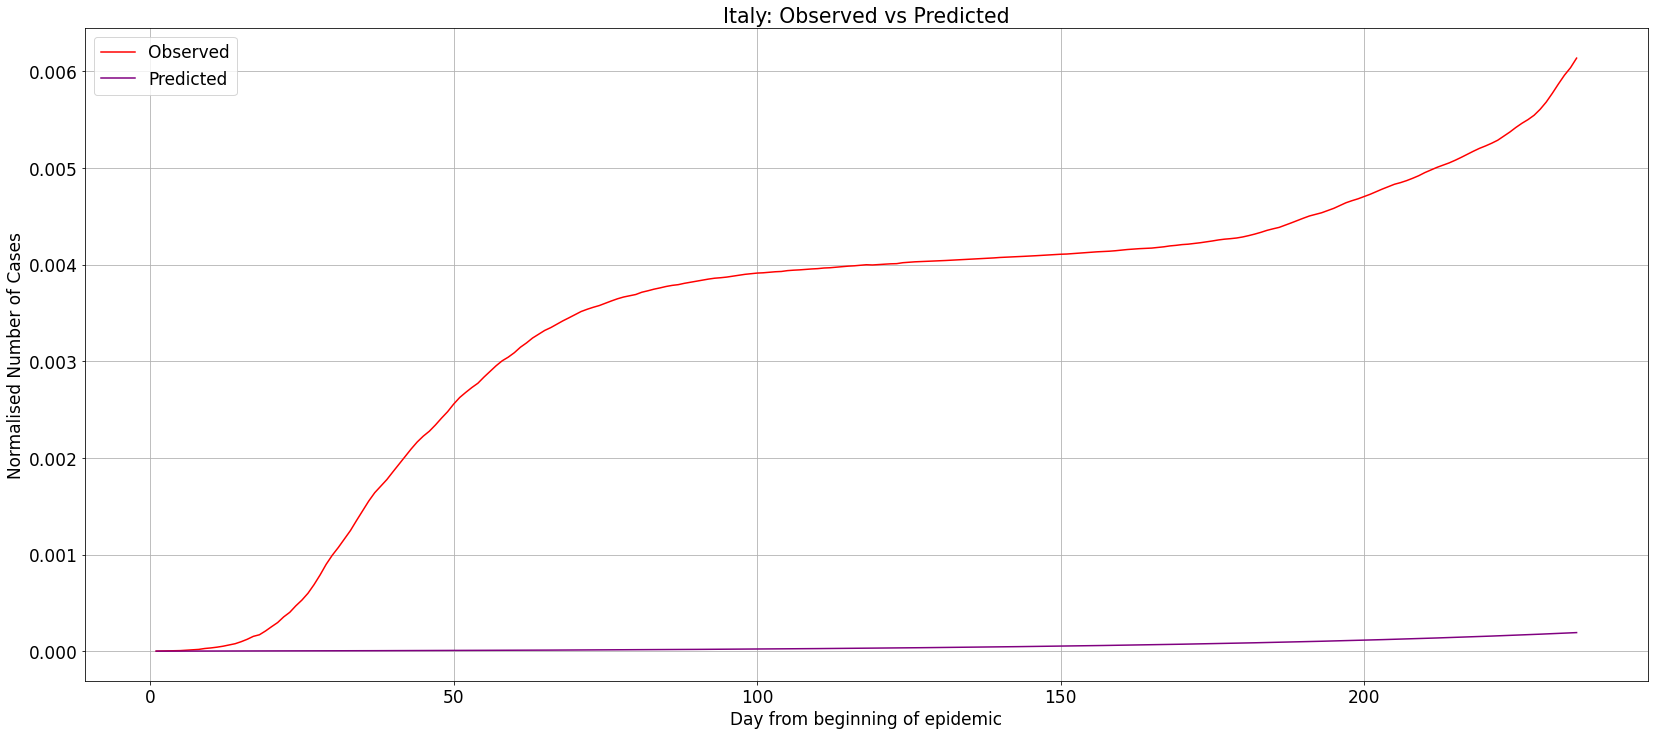

In [1060]:
plt.figure()
plt.plot(x_int3,ita_norm_case[:235],color="red", label = 'Observed')
plt.plot(x_int3, p , color="purple",label = 'Predicted')

#plt.xticks(np.arange(-1,238,0.))
#plt.yticks(np.arange(-1,2.5,0.0005))
plt.xlabel('Day from beginning of epidemic')
plt.ylabel('Normalised Number of Cases')
plt.title('Italy: Observed vs Predicted')
plt.legend(loc="upper left")
plt.rcParams['figure.figsize'] = [28,12]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

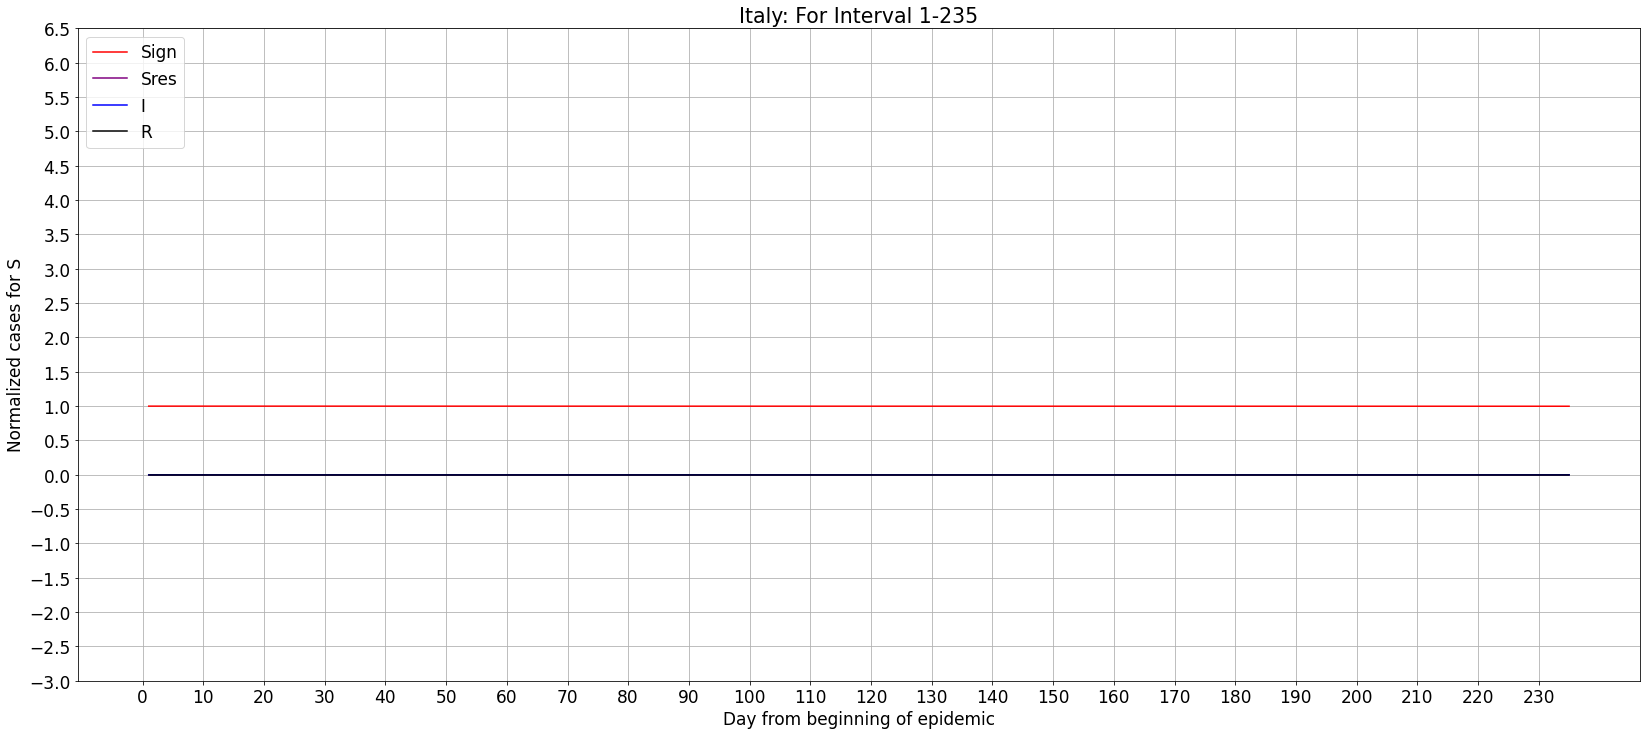

In [1061]:
plt.figure()
plt.plot(x_int3,sol.y[0],color="red", label = 'Sign')
plt.plot(x_int3,sol.y[1], color="purple",label = 'Sres')
#plt.plot(x_int1,dSexhdt, color="green",label = 'Sexh')
plt.plot(x_int3,sol.y[2], color="blue",label = 'I')
plt.plot(x_int3,sol.y[3], color="black",label = 'R')
plt.xticks(np.arange(0,235,10))
plt.yticks(np.arange(-3,7,0.5))
plt.xlabel('Day from beginning of epidemic')
plt.ylabel('Normalized cases for S')
plt.title('Italy: For Interval 1-235')
plt.legend(loc="upper left")
plt.rcParams['figure.figsize'] = [28,12]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

Modified Model

In [1062]:
k2 = 0.05
sol = solve_ivp(equations, [1, inp.shape[0]], [Sign,Sres,Sexh,I3,R3],args=(a3,b,k2,k3,k6), t_eval= x_int3)

In [1063]:
p = sol.y[4] + sol.y[3] 
MSE = np.mean(np.square(p - inp))

print(a3,MSE)
print(p)

0.11426026154882764 1.4000566815081072e-05
[9.36684847e-07 1.03867982e-06 1.14213966e-06 1.24708540e-06
 1.35353836e-06 1.46152019e-06 1.57105286e-06 1.68215863e-06
 1.79486010e-06 1.90918609e-06 2.02517016e-06 2.14283313e-06
 2.26219601e-06 2.38328035e-06 2.50610826e-06 2.63070241e-06
 2.75708604e-06 2.88528291e-06 3.01531739e-06 3.14721436e-06
 3.28099929e-06 3.41669818e-06 3.55433761e-06 3.69394471e-06
 3.83554716e-06 3.97917321e-06 4.12485166e-06 4.27261185e-06
 4.42248372e-06 4.57449773e-06 4.72868490e-06 4.88507684e-06
 5.04370567e-06 5.20460411e-06 5.36780541e-06 5.53334338e-06
 5.70125241e-06 5.87156742e-06 6.04432389e-06 6.21955787e-06
 6.39730598e-06 6.57760535e-06 6.76049372e-06 6.94600935e-06
 7.13419108e-06 7.32507830e-06 7.51871094e-06 7.71512952e-06
 7.91437510e-06 8.11648928e-06 8.32151426e-06 8.52949276e-06
 8.74046806e-06 8.95448402e-06 9.17158504e-06 9.39181609e-06
 9.61522267e-06 9.84185087e-06 1.00717473e-05 1.03049592e-05
 1.05415343e-05 1.07815209e-05 1.10249678e

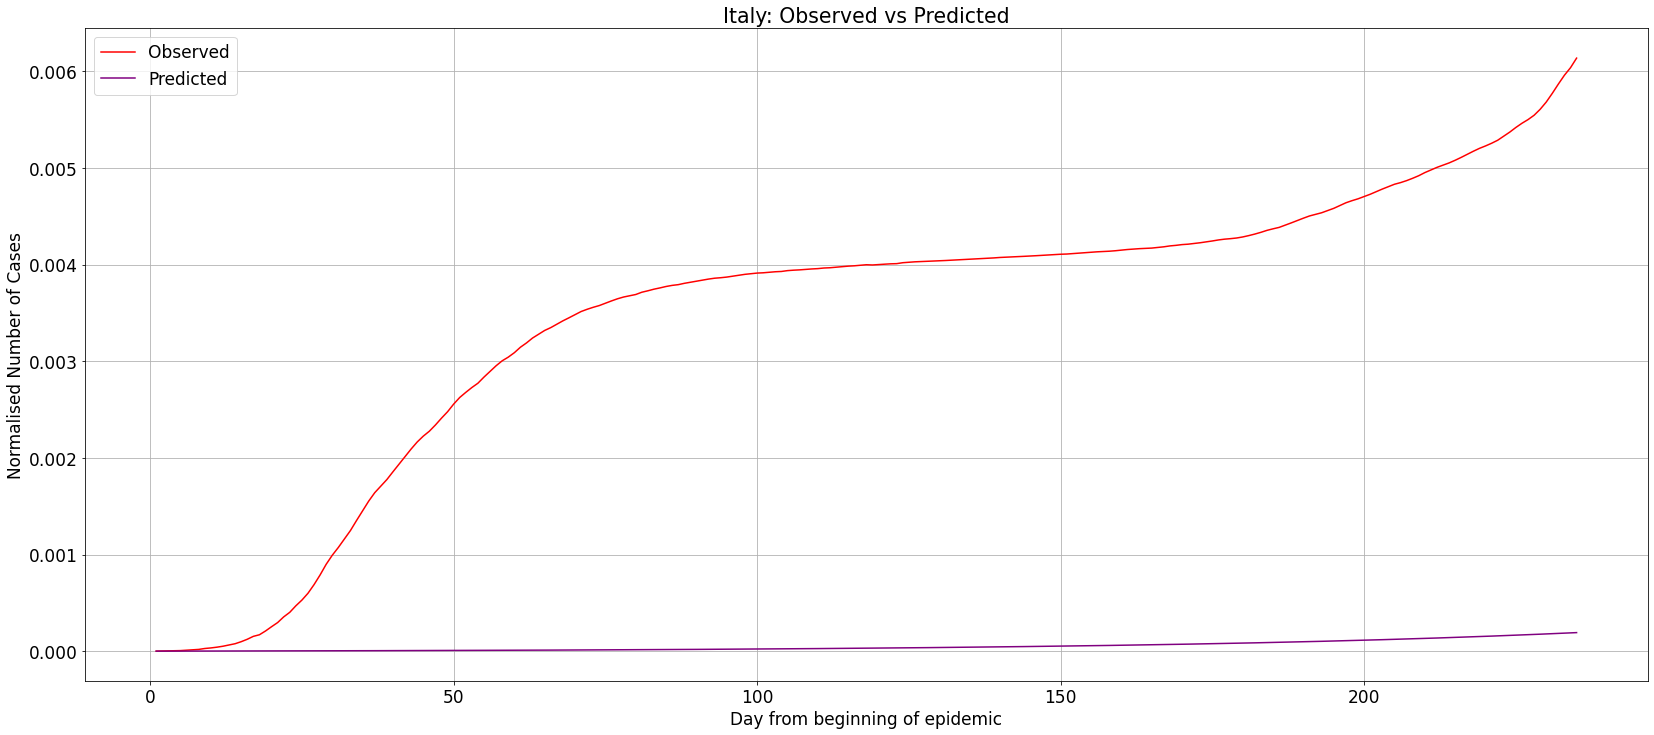

In [1064]:
plt.figure()
plt.plot(x_int3,ita_norm_case[:235],color="red", label = 'Observed')
plt.plot(x_int3, p , color="purple",label = 'Predicted')

#plt.xticks(np.arange(-1,238,0.))
#plt.yticks(np.arange(-1,2.5,0.0005))
plt.xlabel('Day from beginning of epidemic')
plt.ylabel('Normalised Number of Cases')
plt.title('Italy: Observed vs Predicted')
plt.legend(loc="upper left")
plt.rcParams['figure.figsize'] = [28,12]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

Crowd Effect

In [1065]:
k2 = 1
Ip = 0.02
q = k2/Ip
rate = q * Sign * Ip**2
print(rate)
print(q)

0.01999998126630306
50.0


In [1066]:
def equat_rate(t, y,a,b,rate,k3,k6):
    # Y[0] = S(t)
    # Y[1] = R(t)
    #Sexh = 1 -y[0]-y[1] - y[2] - y[3]
    
    dSigndt = -a * y[0] * y[3] - rate + k6 * y[2]
    dSresdt = rate - k3 * y[1]
    dSexhdt = k3 * y[1] - a * y[2] * y[3] -k6 * y[2]
    
    dIdt = a * y[0] * y[3] + a * y[2] * y[3] - b * y[3]
    dRdt = b * y[3]
    
    return [dSigndt, dSresdt,dSexhdt, dIdt, dRdt]
inp = ita_norm_case[:235]


In [1067]:
from scipy.integrate import solve_ivp
sol = solve_ivp(equat_rate, [1, inp.shape[0]], [Sign,Sres,Sexh, I3, R3], args = (a3,b,rate,k3,k6), t_eval= x_int3)
p = sol.y[3] + sol.y[4]
MSE = np.mean(np.square(p - inp))

print(a2,MSE)
print(p)
sol.y

0.10373405017328197 1.4446496353725208e-05
[9.36684847e-07 1.03762607e-06 1.13776317e-06 1.23688235e-06
 1.33478136e-06 1.43126968e-06 1.52616355e-06 1.61926790e-06
 1.71044304e-06 1.79956886e-06 1.88653626e-06 1.97124707e-06
 2.05361412e-06 2.13356118e-06 2.21102300e-06 2.28594528e-06
 2.35828470e-06 2.42800892e-06 2.49509653e-06 2.55953712e-06
 2.62133122e-06 2.68049035e-06 2.73703698e-06 2.79100454e-06
 2.84239152e-06 2.89110478e-06 2.93724791e-06 2.98093952e-06
 3.02229400e-06 3.06142149e-06 3.09842787e-06 3.13341482e-06
 3.16647972e-06 3.19771576e-06 3.22721186e-06 3.25505268e-06
 3.28131869e-06 3.30608607e-06 3.32942677e-06 3.35140850e-06
 3.37209474e-06 3.39154471e-06 3.40981339e-06 3.42695151e-06
 3.44300559e-06 3.45801786e-06 3.47202635e-06 3.48506482e-06
 3.49716280e-06 3.50834556e-06 3.51863416e-06 3.52804538e-06
 3.53659179e-06 3.54428169e-06 3.55144870e-06 3.55848163e-06
 3.56533272e-06 3.57195651e-06 3.57831133e-06 3.58435937e-06
 3.59006666e-06 3.59540303e-06 3.60034216e

array([[ 9.99999063e-01,  9.79999634e-01,  9.60004138e-01, ...,
        -1.61657697e+00, -1.62029678e+00, -1.62398145e+00],
       [ 9.36684847e-07,  1.98022269e-02,  3.92114270e-02, ...,
         9.90323237e-01,  9.90514824e-01,  9.90702622e-01],
       [-9.36684847e-07,  1.97101445e-04,  7.83297043e-04, ...,
         1.62625020e+00,  1.62977842e+00,  1.63327529e+00],
       [ 8.86307013e-07,  8.98016455e-07,  9.07844643e-07, ...,
         1.14949860e-07,  1.09564457e-07,  1.01327433e-07],
       [ 5.03778338e-08,  1.39609614e-07,  2.29918531e-07, ...,
         3.42422070e-06,  3.42966462e-06,  3.43799029e-06]])

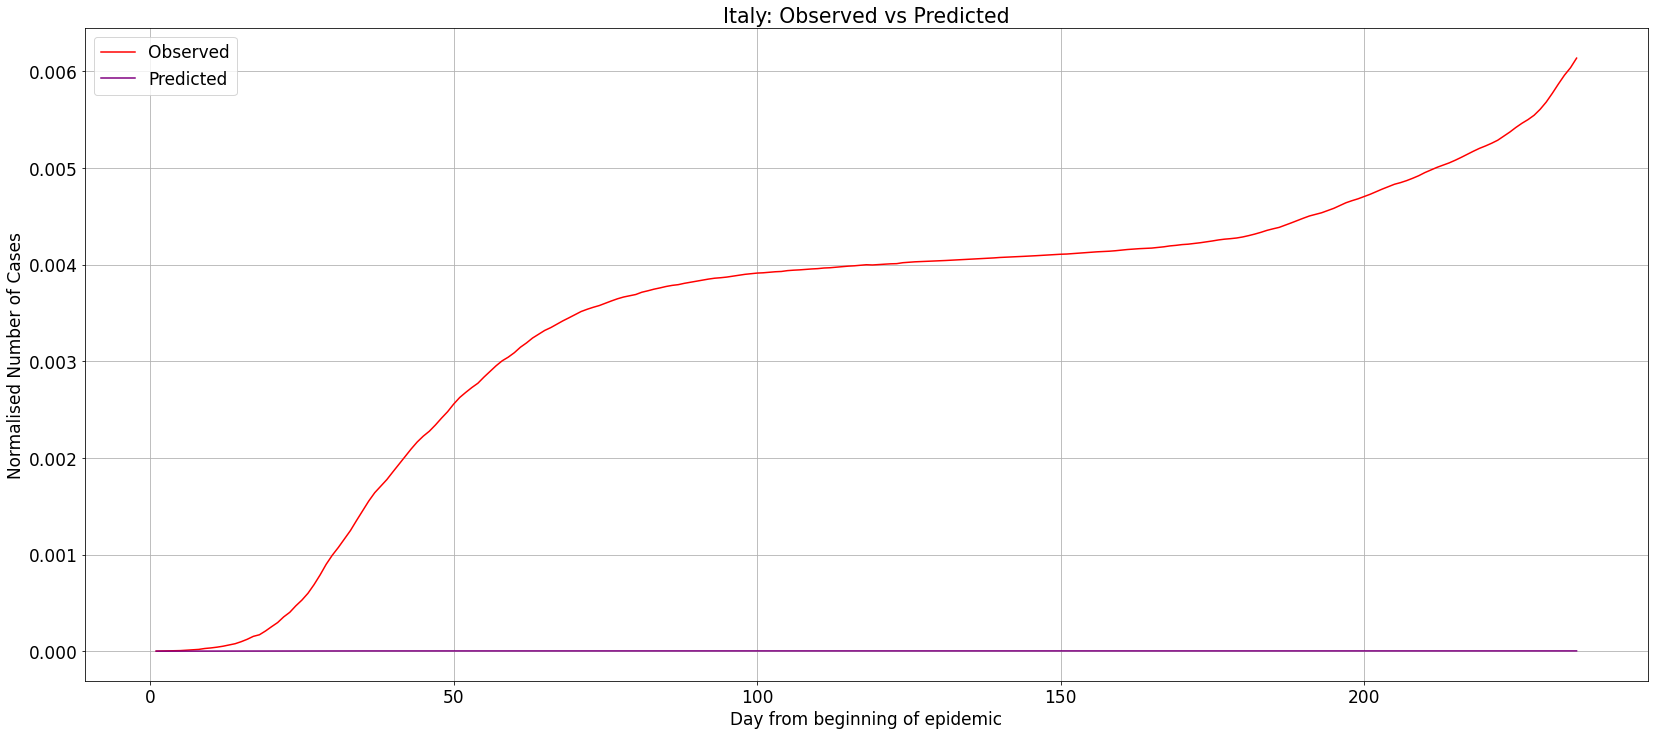

In [1068]:
plt.figure()
plt.plot(x_int3,ita_norm_case[:235],color="red", label = 'Observed')
plt.plot(x_int3, p , color="purple",label = 'Predicted')

#plt.xticks(np.arange(-1,238,0.))
#plt.yticks(np.arange(-1,2.5,0.0005))
plt.xlabel('Day from beginning of epidemic')
plt.ylabel('Normalised Number of Cases')
plt.title('Italy: Observed vs Predicted')
plt.legend(loc="upper left")
plt.rcParams['figure.figsize'] = [28,12]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

Interval 4: 1 - 574

In [1069]:
obv_y = ita_norm_case[:574]
linreg4 = c4 + r4 * x_int4
expit(linreg4)
exp_y = np.exp(linreg4)

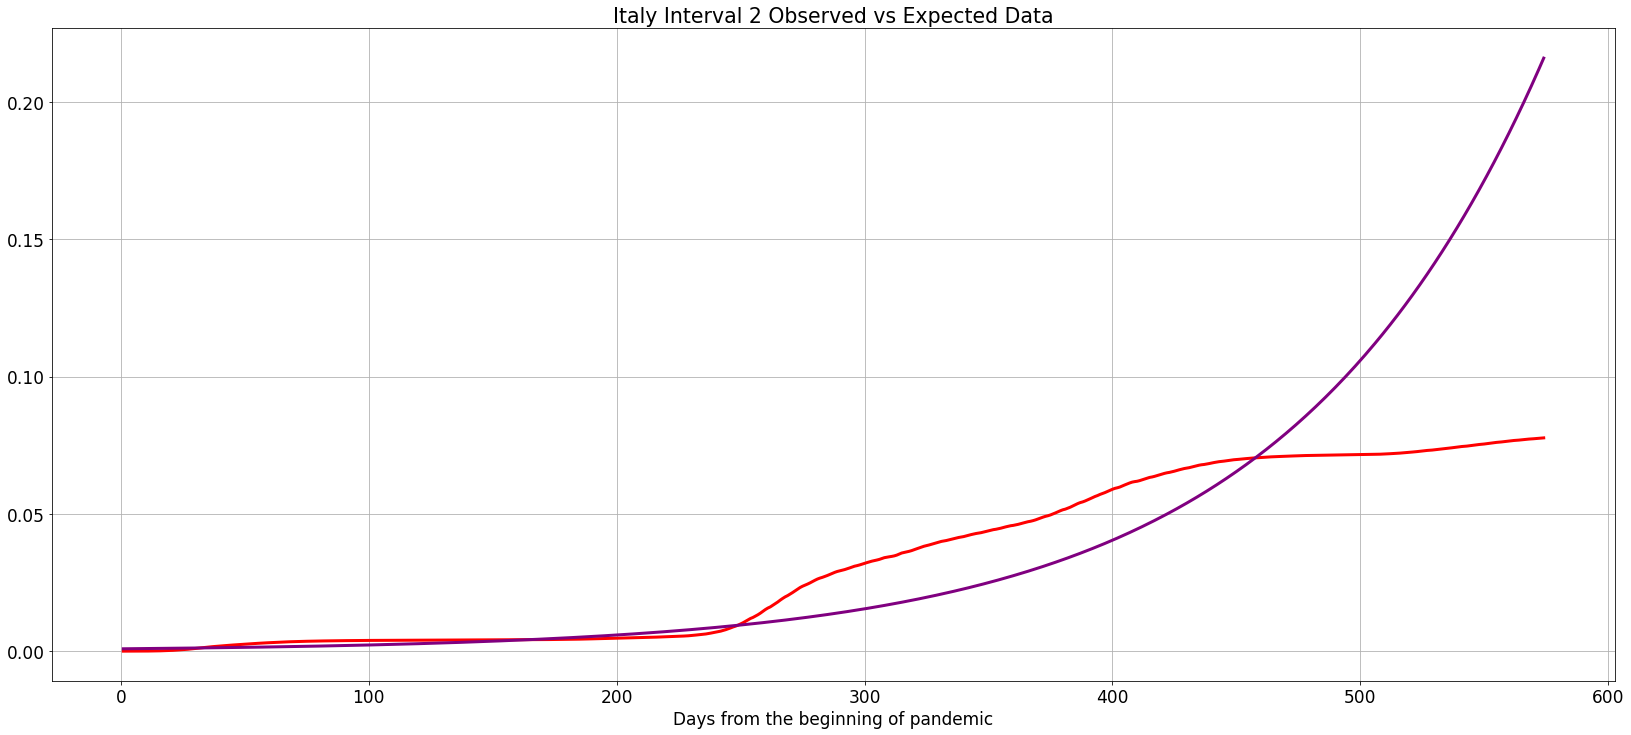

In [1070]:
plt.plot(x_int4,obv_y,color="red",linewidth=3.0)
plt.plot(x_int4,exp_y,color="purple",linewidth=3.0)

#plt.xaxis.set_ticks(np.arange(0,625,13))
#plt.yaxis.set_ticks
#plt.xticks(np.arange(0,35,2))
#plt.yticks(np.arange(0,0.005,0.0005))
plt.title('Italy Interval 2 Observed vs Expected Data')
plt.xlabel('Days from the beginning of pandemic')
plt.rcParams['figure.figsize'] = [28,12]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

In [1088]:
day_10 = ita['Cumulative_cases'][42]
R4 = day_10 / ita_pop
print(R4)
I4 = ita_new['Cumulative_cases'][1]/tur_pop - R4
print(I4)
S4 = 1- I4 - R4
print(S4)
Sign =S4
Sres= 1-Sign
Sexh = 1 - (Sign +Sres +I4 + R4)

5.0377833753148615e-08
8.863070132945156e-07
0.9999990633151529


In [1089]:
b=0.1
a4= r4+b
print(a4)

0.10963509192760246


In [1090]:
def equations(t, y,a,b,k2,k3,k6):
    # Y[0] = S(t)
    # Y[1] = R(t)
    #Sexh = 1 -y[0]-y[1] - y[2] - y[3]
    
    dSigndt = -a * y[0] * y[3] - k2 * y[0] * y[3] + k6 * y[2]
    dSresdt = k2 * y[0] * y[3] - k3 * y[1]
    dSexhdt = k3 * y[1] - a * y[2] * y[3] -k6 * y[2]
    
    dIdt = a * y[0] * y[3] + a * y[2] * y[3] - b * y[3]
    dRdt = b * y[3]
    
    return [dSigndt, dSresdt,dSexhdt, dIdt, dRdt]
inp = ita_norm_case[:574]
#inp.shape[0]

In [1091]:
sol = solve_ivp(equations, [1, inp.shape[0]], [Sign,Sres,Sexh,I4, R4],args=(a4,b,k2,k3,k6), t_eval= x_int4)
sol.y

array([[ 9.99999063e-01,  9.99998066e-01,  9.99997059e-01, ...,
         9.83985804e-01,  9.83841871e-01,  9.83696749e-01],
       [ 9.36684847e-07,  1.79989380e-06,  2.65454581e-06, ...,
         6.68819974e-03,  6.74697610e-03,  6.80620268e-03],
       [-9.36684847e-07, -9.00106493e-07, -8.46799735e-07, ...,
         7.00173954e-03,  7.06557215e-03,  7.12996141e-03],
       [ 8.86307013e-07,  8.94887704e-07,  9.03551374e-07, ...,
         1.95412505e-04,  1.97108742e-04,  1.98817922e-04],
       [ 5.03778338e-08,  1.39436882e-07,  2.29358141e-07, ...,
         2.12884440e-03,  2.14847233e-03,  2.16826923e-03]])

In [1092]:
p = sol.y[3] + sol.y[4]
MSE = np.mean(np.square(p - inp))

print(a4,MSE)

0.10963509192760246 0.0018779760825829673


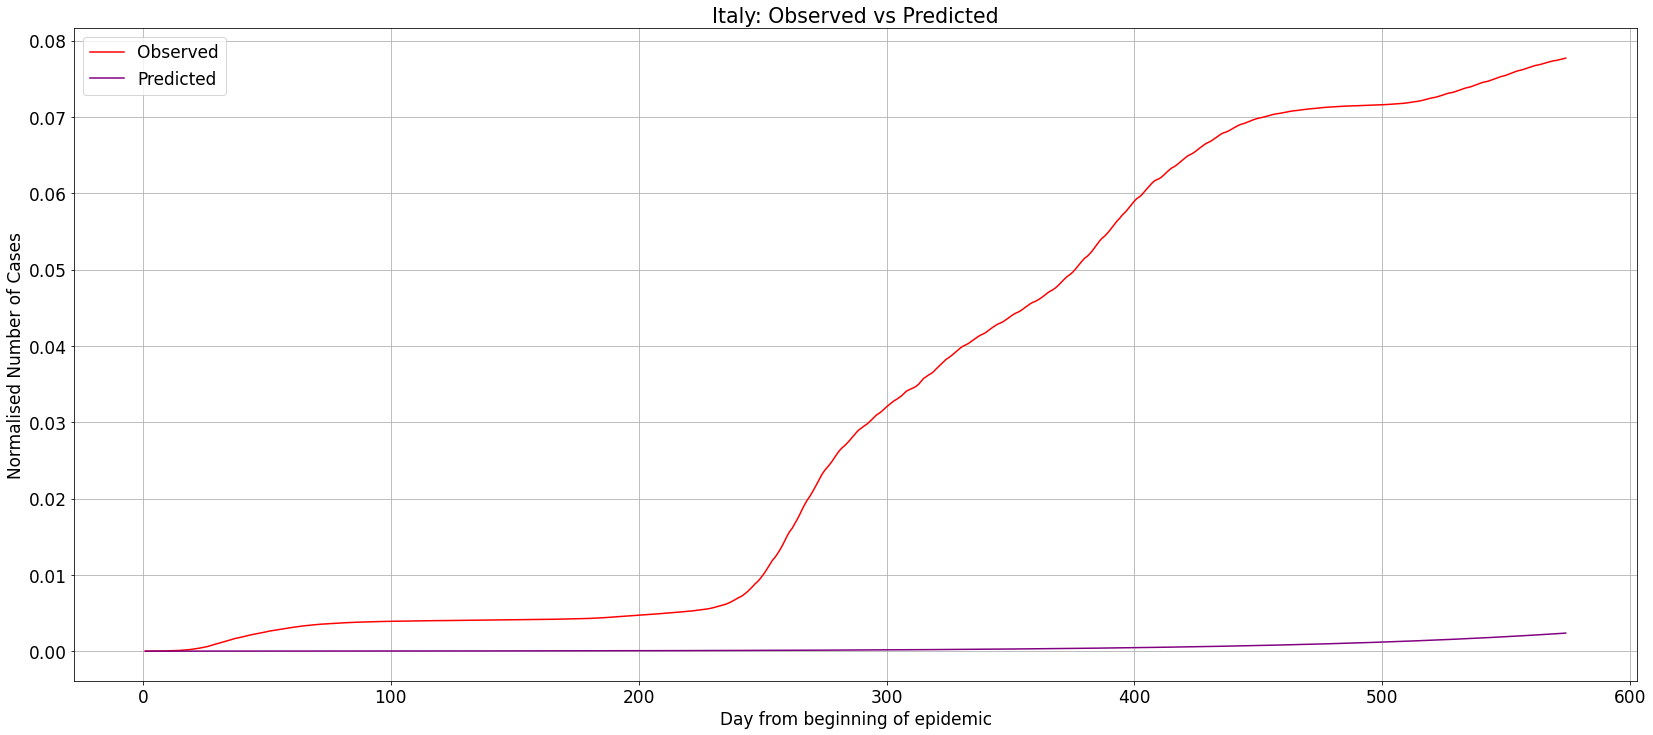

In [1093]:
plt.figure()
plt.plot(x_int4,ita_norm_case[:574],color="red", label = 'Observed')
plt.plot(x_int4, p , color="purple",label = 'Predicted')
#plt.xticks(np.arange(0,600,15))
#plt.yticks(np.arange(0,0.09,0.005))
plt.xlabel('Day from beginning of epidemic')
plt.ylabel('Normalised Number of Cases')
plt.title('Italy: Observed vs Predicted')
plt.legend(loc="upper left")
plt.rcParams['figure.figsize'] = [30,12]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

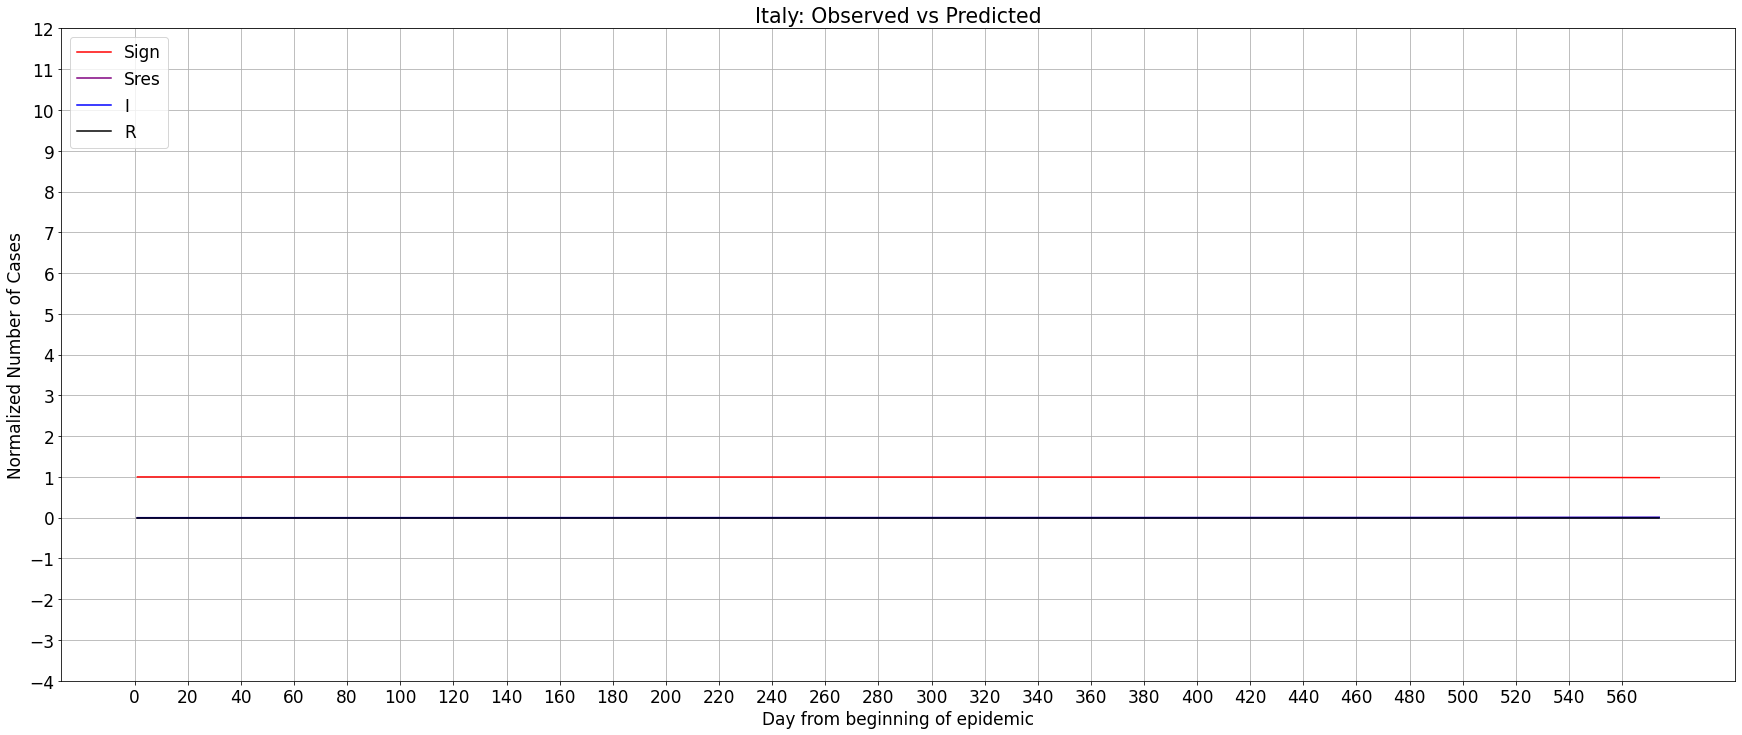

In [1094]:
plt.figure()
plt.plot(x_int4,sol.y[0],color="red", label = 'Sign')
plt.plot(x_int4,sol.y[1], color="purple",label = 'Sres')
#plt.plot(x_int1,dSexhdt, color="green",label = 'Sexh')
plt.plot(x_int4,sol.y[2], color="blue",label = 'I')
plt.plot(x_int4,sol.y[3], color="black",label = 'R')
plt.xticks(np.arange(0,574,20))
plt.yticks(np.arange(-4,13,1))
plt.xlabel('Day from beginning of epidemic')
plt.ylabel('Normalized Number of Cases')
plt.title('Italy: Observed vs Predicted')
plt.legend(loc="upper left")
plt.rcParams['figure.figsize'] = [28,12]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

Modified Model

In [1095]:
k2 = 0.05
sol = solve_ivp(equations, [1, inp.shape[0]], [Sign,Sres,Sexh,I4, R4],args=(a4,b,k2,k3,k6), t_eval= x_int4)

In [1096]:
p = 1 - sol.y[0, :]
MSE = np.mean(np.square(p - inp))

print(a4,MSE)

0.10963509192760246 0.0018595249296425303


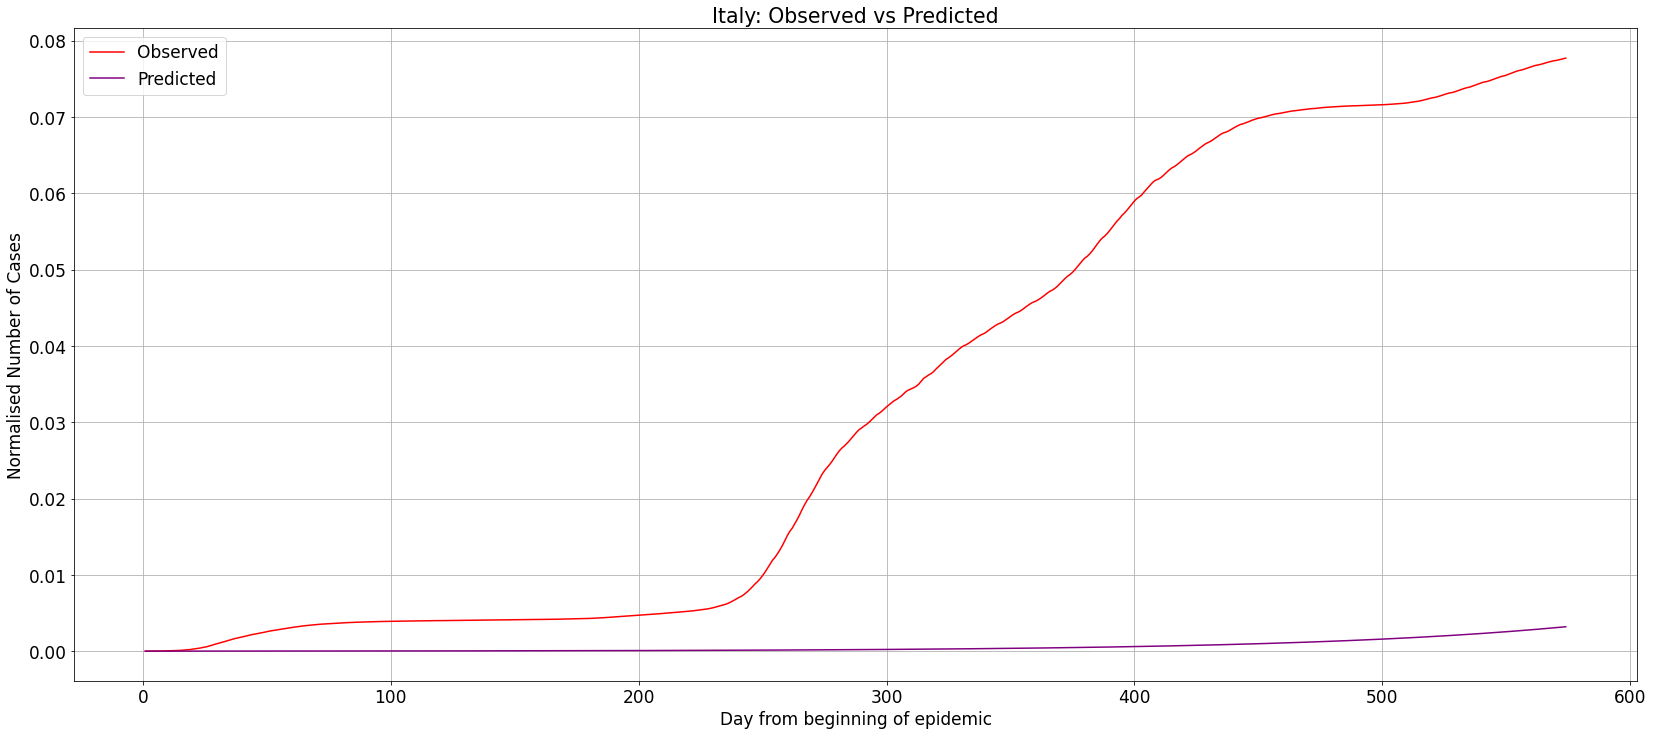

In [1097]:
plt.figure()
plt.plot(x_int4,ita_norm_case[:574],color="red", label = 'Observed')
plt.plot(x_int4, p , color="purple",label = 'Predicted')
#plt.xticks(np.arange(0,600,15))
#plt.yticks(np.arange(0,0.09,0.005))
plt.xlabel('Day from beginning of epidemic')
plt.ylabel('Normalised Number of Cases')
plt.title('Italy: Observed vs Predicted')
plt.legend(loc="upper left")
plt.rcParams['figure.figsize'] = [30,12]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

Crowd Effect

In [1098]:
k2 = 1
Ip = 0.02
q = k2/Ip
rate = q * Sign * Ip**2
print(rate)
print(q)

0.01999998126630306
50.0


In [1099]:
def equat_rate(t, y,a,b,rate,k3,k6):
    # Y[0] = S(t)
    # Y[1] = R(t)
    #Sexh = 1 -y[0]-y[1] - y[2] - y[3]
    
    dSigndt = -a * y[0] * y[3] - rate + k6 * y[2]
    dSresdt = rate - k3 * y[1]
    dSexhdt = k3 * y[1] - a * y[2] * y[3] -k6 * y[2]
    
    dIdt = a * y[0] * y[3] + a * y[2] * y[3] - b * y[3]
    dRdt = b * y[3]
    
    return [dSigndt, dSresdt,dSexhdt, dIdt, dRdt]
inp = ita_norm_case[:574]


In [1100]:
from scipy.integrate import solve_ivp
sol = solve_ivp(equat_rate, [1, inp.shape[0]], [Sign,Sres,Sexh, I4, R4], args = (a4,b,rate,k3,k6), t_eval= x_int4)
p = sol.y[3] + sol.y[4]
MSE = np.mean(np.square(p - inp))

print(a2,MSE)
print(p)

0.10373405017328197 0.001934422175485388
[9.36684847e-07 1.03331811e-06 1.12874798e-06 1.22278912e-06
 1.31526896e-06 1.40602781e-06 1.49491317e-06 1.58175895e-06
 1.66646051e-06 1.74893265e-06 1.82909965e-06 1.90689527e-06
 1.98226275e-06 2.05515480e-06 2.12553363e-06 2.19337091e-06
 2.25864780e-06 2.32135493e-06 2.38149244e-06 2.43906990e-06
 2.49410640e-06 2.54663049e-06 2.59668020e-06 2.64430306e-06
 2.68952167e-06 2.73229034e-06 2.77270960e-06 2.81089054e-06
 2.84694039e-06 2.88096250e-06 2.91305639e-06 2.94331771e-06
 2.97183823e-06 2.99870589e-06 3.02400475e-06 3.04781502e-06
 3.07021305e-06 3.09127133e-06 3.11105848e-06 3.12963928e-06
 3.14707464e-06 3.16342160e-06 3.17873336e-06 3.19305924e-06
 3.20644473e-06 3.21893143e-06 3.23055710e-06 3.24135563e-06
 3.25135704e-06 3.26058753e-06 3.26906939e-06 3.27682109e-06
 3.28385722e-06 3.29018852e-06 3.29610659e-06 3.30194536e-06
 3.30765860e-06 3.31320233e-06 3.31853615e-06 3.32362326e-06
 3.32843042e-06 3.33292802e-06 3.33709002e-0

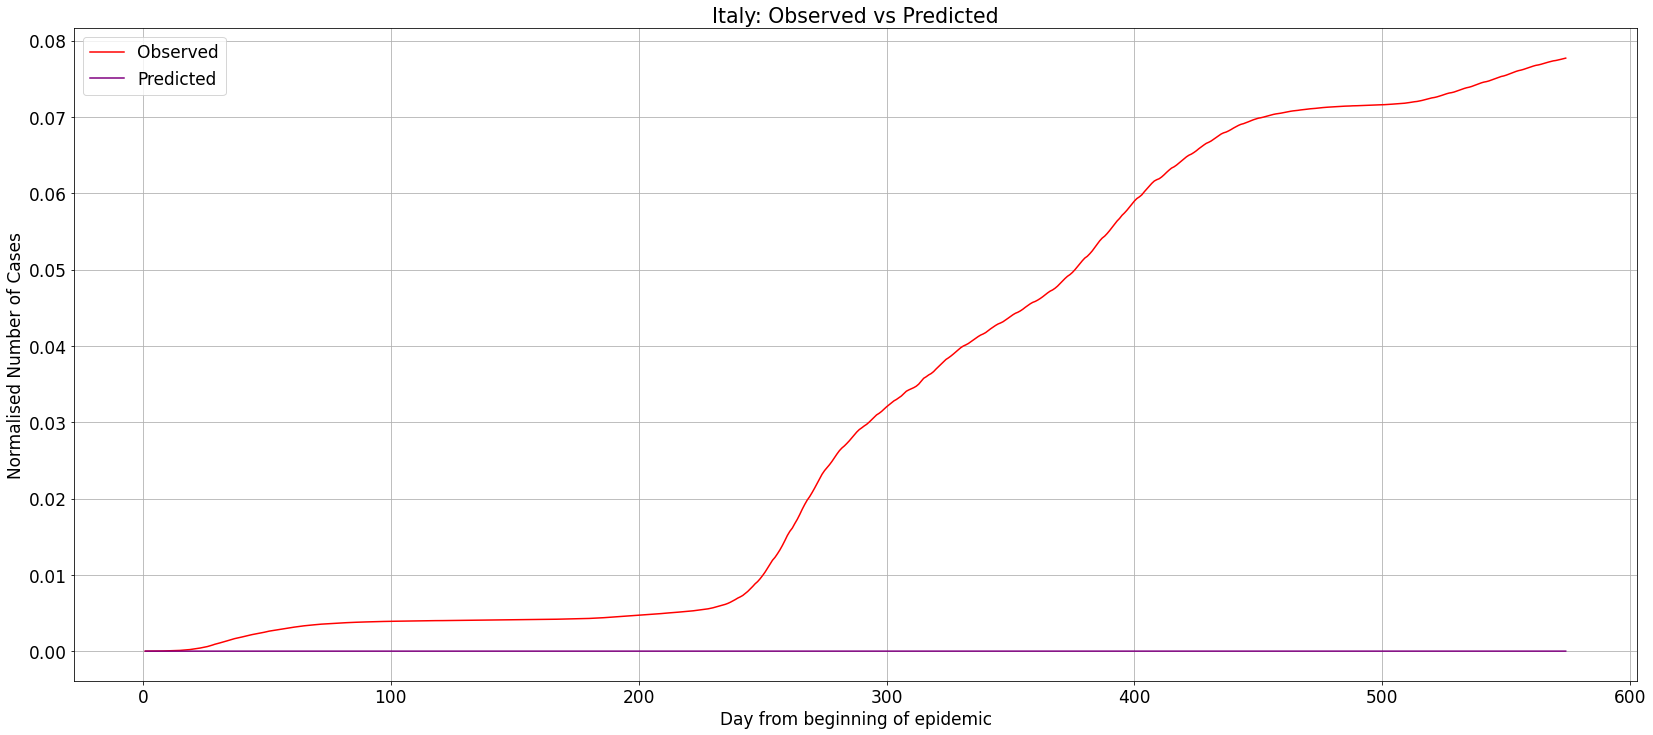

In [1104]:
plt.figure()
plt.plot(x_int4,ita_norm_case[:574],color="red", label = 'Observed')
plt.plot(x_int4, p , color="purple",label = 'Predicted')

#plt.xticks(np.arange(-,238,0.))
#plt.yticks(np.arange(-1,3,0.05))
plt.xlabel('Day from beginning of epidemic')
plt.ylabel('Normalised Number of Cases')
plt.title('Italy: Observed vs Predicted')
plt.legend(loc="upper left")
plt.rcParams['figure.figsize'] = [28,12]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()